<center>
    <img src="https://img-cdn.thepublive.com/fit-in/1200x675/entrackr/media/post_attachments/wp-content/uploads/2022/09/Yulu.jpg" alt="image not available" style="max-width: 100%; height: auto;">
</center>

# **Business Problem**
<p> Yulu, India's leading micro-mobility service provider, has recently faced a significant decline in its revenue. The company offers shared electric cycles for daily commuting, aiming to solve the traffic congestion problem in Indian cities. Yulu operates in zones at key locations like metro stations, bus stands, office spaces, and residential areas, providing an affordable and sustainable commuting option through its mobile app. However, the company is now struggling with understanding the factors that drive demand for these shared cycles.

To address this, Yulu has contracted a consulting firm to identify the key variables affecting the demand for shared electric cycles in the Indian market. The company seeks to understand how factors like the type of day (working day or holiday), weather conditions, season, and temperature influence the number of cycles rented. By determining which variables are significant in predicting demand, Yulu aims to develop strategies to boost its rentals and improve its revenue.

The goal is to perform exploratory data analysis (EDA) on the dataset provided by Yulu to identify patterns and relationships between different variables, test hypotheses on factors influencing demand, and make data-driven recommendations to help the company improve its business performance.<p/>

# **Yulu Dataset**
**datetime** : This field represents the date and time of the data point. It's likely a Python datetime object.

**season** : This field indicates the season (1: spring, 2: summer, 3: fall, 4: winter).

**holiday**: This field is a boolean value (True/False) indicating whether the day is a holiday or not.

**workingday**: This field is another boolean value (True/False) indicating whether the day is a weekday (not a weekend or holiday).

**weather**: This field is a categorical variable with numerical codes representing different weather conditions:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp**: This field represents the temperature in Celsius.

**atemp**: This field represents the feeling temperature in Celsius.

**humidity**: This field represents the humidity level.

**windspeed**: This field represents the wind speed.

**casual**: This field represents the number of casual users who rented bikes
.

**registered**: This field represents the number of registered users who rented bikes.

**count**: This field represents the total number of bikes rented, including both casual and registered users.

# **Libraries Utilized for Data Exploration and Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import levene, ttest_ind,kruskal,mannwhitneyu,chi2_contingency,shapiro
import warnings
warnings.filterwarnings('ignore')


# **Loading the Dataset for Analysis**

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

# **Previewing the First Five Entries of the Dataset**

In [3]:
df.head(5)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

# **Analysing basic metrics**

In [4]:
print(f"Total Number of rows: {df.shape[0]}")
print(f"Total Number of columns: {df.shape[1]}")

Total Number of rows: 10886
Total Number of columns: 12


# **Summary of the DataFrame Structure**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## **Type conversion of Catagorical data**

In [6]:
categorical_columns=['holiday','workingday','weather','season']
df[categorical_columns] = df[categorical_columns].astype('category')

 # **conversion of categorical attributes to category**

In [7]:
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})
df['weather'] = df['weather'].replace({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'})
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

Converting Numerical Values to Categorical for Better Analysis Interpretability

# **Statistical Summary**

In [8]:
df.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    284.000000  
max      886.000000    977.000000

In [9]:
df.describe(include='category')

season holiday workingday weather
count    10886   10886      10886   10886
unique       4       2          2       4
top     Winter      No        Yes   Clear
freq      2734   10575       7412    7192

## **Unique Values, and Frequency of Unique Values in the Dataset.**

In [10]:
for i in df.columns:
    print(f"Column: {i}")
    print(f"Total Number of Unique Values: {df[i].nunique()}")
    print(f"Top 5 Most Frequent Values:\n{df[i].value_counts().head(5)}")
    print("-" * 50)

Column: datetime
Total Number of Unique Values: 10886
Top 5 Most Frequent Values:
datetime
2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
Name: count, dtype: int64
--------------------------------------------------
Column: season
Total Number of Unique Values: 4
Top 5 Most Frequent Values:
season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64
--------------------------------------------------
Column: holiday
Total Number of Unique Values: 2
Top 5 Most Frequent Values:
holiday
No     10575
Yes      311
Name: count, dtype: int64
--------------------------------------------------
Column: workingday
Total Number of Unique Values: 2
Top 5 Most Frequent Values:
workingday
Yes    7412
No     3474
Name: count, dtype: int64
--------------------------------------------------
Column: weather
Total Number of Unique Values: 4
Top 5 Most Frequent Values:
weather
Clear         7192
Mis

## **Examination of Missing Values by Column**

In [11]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**The dataset is free of null values.**

**Creating New Features: Month and Year from Datetime Column**

In [12]:
df['year'] = pd.to_datetime(df['datetime']).dt.year.astype(int)
df['month'] = pd.to_datetime(df['datetime']).dt.strftime('%b')

# **Data Exploration and Conducting Graphical Analysis**

# **Reusable Function for Ploting Graphs**


In [13]:
def plotLinePlot(dataFrame, x, y, xLabel, yLabel, title, ax, hue=None):
    """Plots a line plot using Seaborn."""
    sns.lineplot(data=dataFrame, x=x, y=y, marker='o', hue=hue, ax=ax)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(title)
    plt.grid(True, linestyle='--', linewidth=0.3, color='gray')


In [14]:
def plotBarPlot(dataFrame, x, y, xLabel, yLabel, title, ax, hue=None):
    """Plots a bar plot using Seaborn."""
    sns.barplot(data=dataFrame, x=x, y=y, hue=hue, ax=ax)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(title)


In [15]:
def plotPieChart(dataFrame, column, title, ax):
    """Plots a pie chart with labels and percentages."""
    counts = dataFrame[column].value_counts()
    colors = plt.cm.tab10.colors  # Or any colormap you prefer
    def autopct_format(value):
        return f"{value:.1f}%" if value > 3.8 else ""  # Conditional percentage display
    wedges, *_ = ax.pie(counts, autopct=autopct_format, startangle=85,
                     explode=(0.05,) * len(counts),  # Explode all slices if needed
                     colors=colors[:len(counts)],  # Use only necessary colors
                     shadow=True, wedgeprops={'edgecolor': 'black'},
                     textprops={'color': 'black'})

    labels_with_percentages = []
    for label, value in counts.items():
        percentage = (value / counts.sum()) * 100
        labels_with_percentages.append(f"{label} ({percentage:.1f}%)")

    ax.legend(wedges, labels_with_percentages, title=column.capitalize(),
              loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(title)


In [16]:
def plotHistogram(dataFrame, column, title, ax, bins=7):
    """Plots a histogram."""
    sns.histplot(data=dataFrame, x=column, bins=bins, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column.capitalize())  # Capitalize x-axis label (column name)
    ax.set_ylabel("Frequency")  # Add a y-axis label

In [17]:
def plotKDE(dataFrame, column, title, ax, hue=None, fill=True):
    """Plots a Kernel Density Estimate (KDE) plot."""

    sns.kdeplot(data=dataFrame, x=column, hue=hue, fill=fill, ax=ax)
    ax.set_xlabel(column.capitalize())  # Capitalize column name for x-label
    ax.set_ylabel('Density')  # Consistent y-label
    ax.set_title(title)


In [18]:
def plot_purchase_boxplot(data, x,xlabel,title,ax,y=None,ylabel=None,hue=None):
  """
  Creates a boxplot of the 'Purchase' column in the given DataFrame.
  """
  sns.boxplot(data=data, x=x, ax=ax, fliersize=5, linewidth=1.5,
            y=y, hue=hue, medianprops={'color': 'green', 'linewidth': 2, 'linestyle': ':'})
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel, fontsize=14)
  ax.set_title(title, fontsize=16)
  ax.tick_params(axis='x', labelsize=12)
  ax.tick_params(axis='y', labelsize=12)
  ax.grid(axis='y', linestyle='--', alpha=0.7)

In [19]:
def plot_hist_plot(df, label, color, ax,hue=None):
    """
    Plots a KDE plot for a specific condition.
    """
    sns.histplot(
        data=df,
        element='step',
        color=color,
        kde=True,
        label=label,
        ax=ax
    )
    ax.legend([label])
    plt.legend()


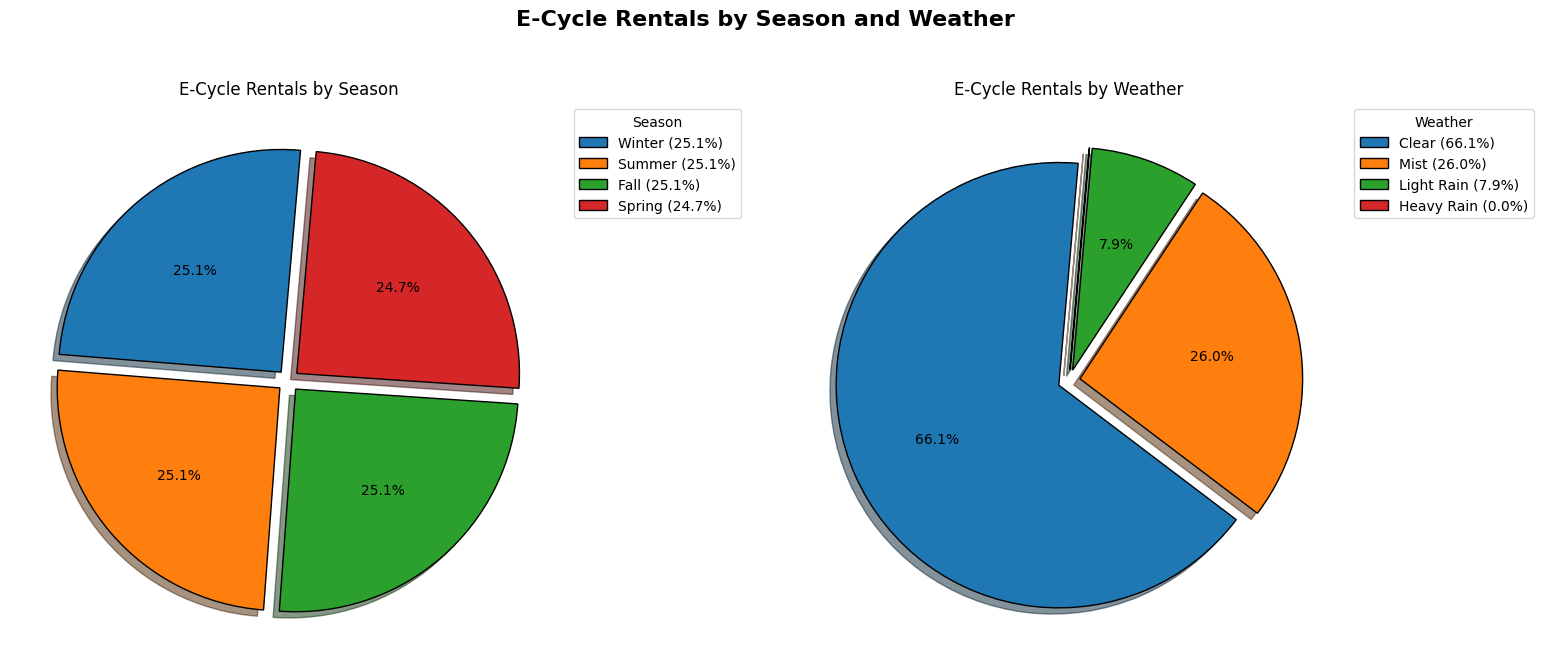

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
plotPieChart(df, 'season', "E-Cycle Rentals by Season", axes[0])
plotPieChart(df, 'weather', "E-Cycle Rentals by Weather", axes[1])
plt.suptitle("E-Cycle Rentals by Season and Weather", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **Observations from the Pie Charts:**

- E-Cycle Rentals by Season:

  Even Distribution: E-cycle rentals are fairly evenly distributed across the four seasons, with each season accounting for approximately 25% of the total rentals. This suggests that seasonality doesn't have a strong impact on overall rental demand.

- E-Cycle Rentals by Weather:

  Clear Weather Dominates: Clear weather conditions account for a significant majority of e-cycle rentals (66.1%). This indicates that favorable weather conditions strongly influence rental demand.
  
  Mist and Light Rain: Mist and light rain conditions account for 26% and 7.9% of rentals, respectively.
  
  Heavy Rain: Heavy rain conditions have minimal impact on rentals, with only 0% of rentals occurring during such weather.

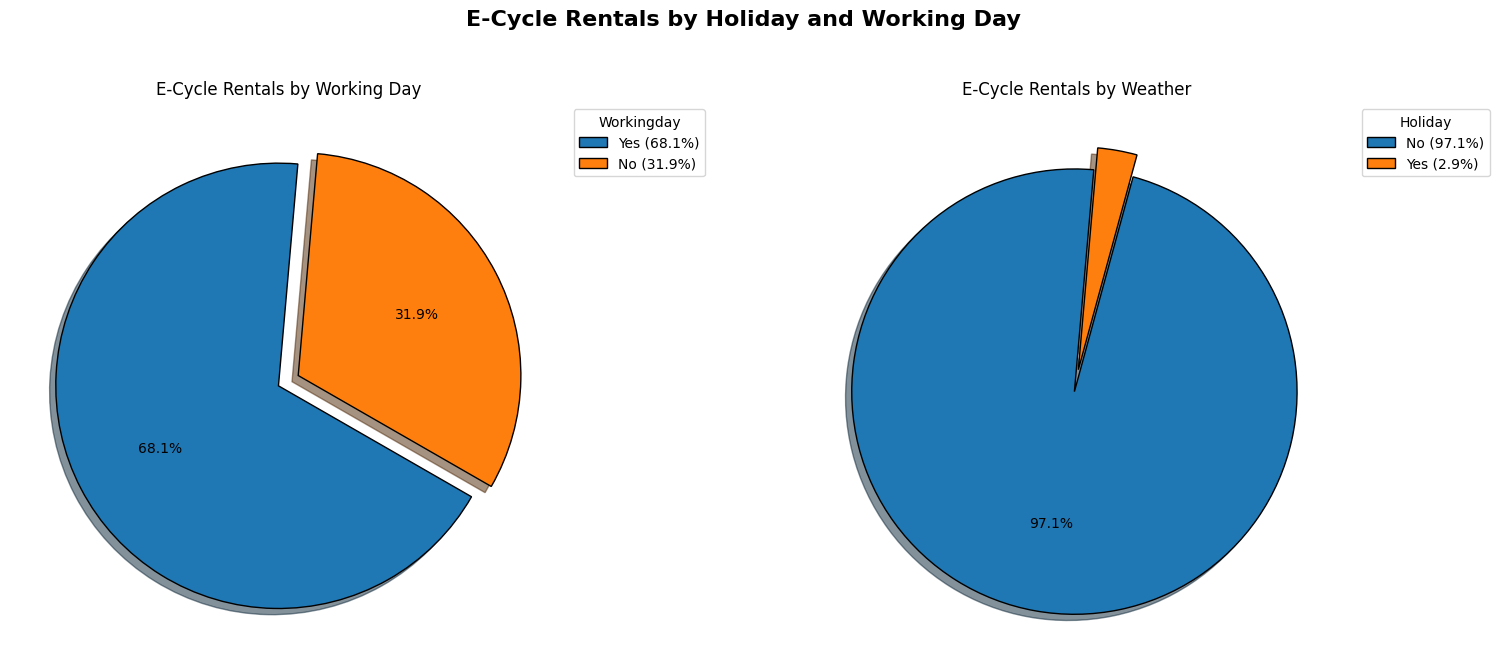

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
plotPieChart(df, 'workingday', "E-Cycle Rentals by Working Day", axes[0])
plotPieChart(df, 'holiday', "E-Cycle Rentals by Weather", axes[1])
plt.suptitle("E-Cycle Rentals by Holiday and Working Day", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **Observations from the Pie Charts:**

- E-Cycle Rentals by Working Day:

  Dominance of Working Days: A significant majority of e-cycle rentals (68.1%) occur on working days. This suggests that work commutes and daily errands are a major driver of e-cycle usage.
- E-Cycle Rentals by Holiday:

  Low Holiday Rentals: Only 2.9% of rentals occur on holidays. This indicates that recreational use of e-cycles on holidays is relatively low compared to their use for commuting and daily errands.

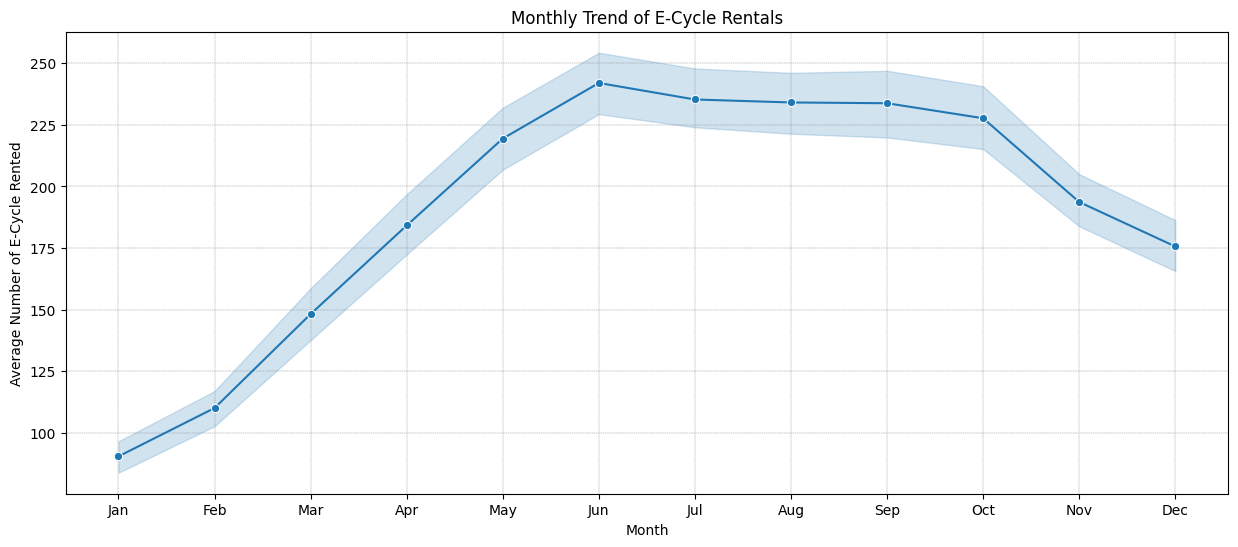

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
plotLinePlot(df, 'month', 'count', 'Month', 'Average Number of E-Cycle Rented', 'Monthly Trend of E-Cycle Rentals', ax)
plt.show()

## **Observations from the Line Plot:**

- Clear Seasonal Trend: The plot shows a clear seasonal pattern in e-cycle rentals.
  - Rentals start increasing from January, reaching a peak in June or July.
  - After the peak, rentals gradually decline towards the end of the year.
- Potential Factors: This seasonal trend could be influenced by various factors:
  - Weather: Warmer months (spring and summer) likely attract more riders due to favorable weather conditions.
  - School Holidays: Summer vacations could lead to increased leisure time and hence, higher rental demand.
  - Social Events: Outdoor events and activities might be more prevalent during certain seasons, driving up rental demand.

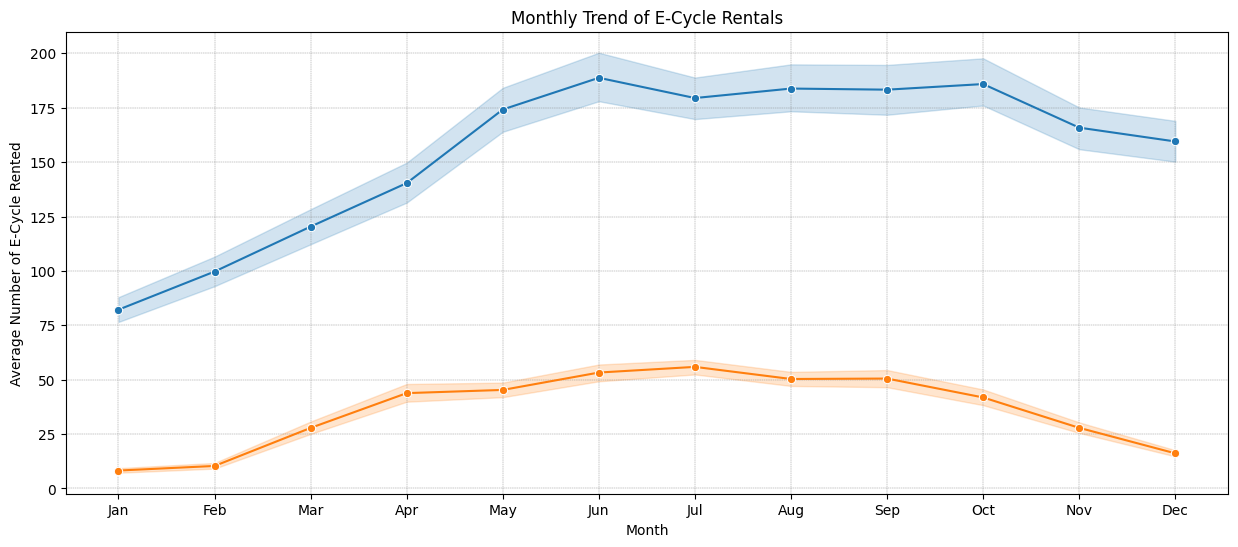

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
plotLinePlot(df, 'month', 'registered', 'Month', 'Average Number of E-Cycle Rented', 'Monthly Trend of E-Cycle Rentals', ax)
plotLinePlot(df, 'month', 'casual', 'Month', 'Average Number of E-Cycle Rented', 'Monthly Trend of E-Cycle Rentals', ax)
plt.show()

## **Observations from the Line Plot:**

- Clear Seasonal Trend: Both registered and casual e-cycle rentals exhibit a strong seasonal pattern.

  - Registered Rentals: Show a significant increase from January to June, peaking around June, and then gradually decline towards the end of the year. This suggests a strong relationship between registered rentals and factors like commuting and work schedules.
  - Casual Rentals: Follow a similar seasonal trend but with a lower overall volume compared to registered rentals. The peak in casual rentals appears to be slightly later than that of registered rentals.
- Difference in Magnitude: The number of registered rentals is significantly higher than the number of casual rentals throughout the year.

In [24]:
seasonal_counts = df.groupby('season')['count'].sum().reset_index()
weather_counts= df.groupby('weather')['count'].sum().reset_index()
weekend_count= df.groupby('holiday')['count'].sum().reset_index()
workingday_count= df.groupby('workingday')['count'].sum().reset_index()

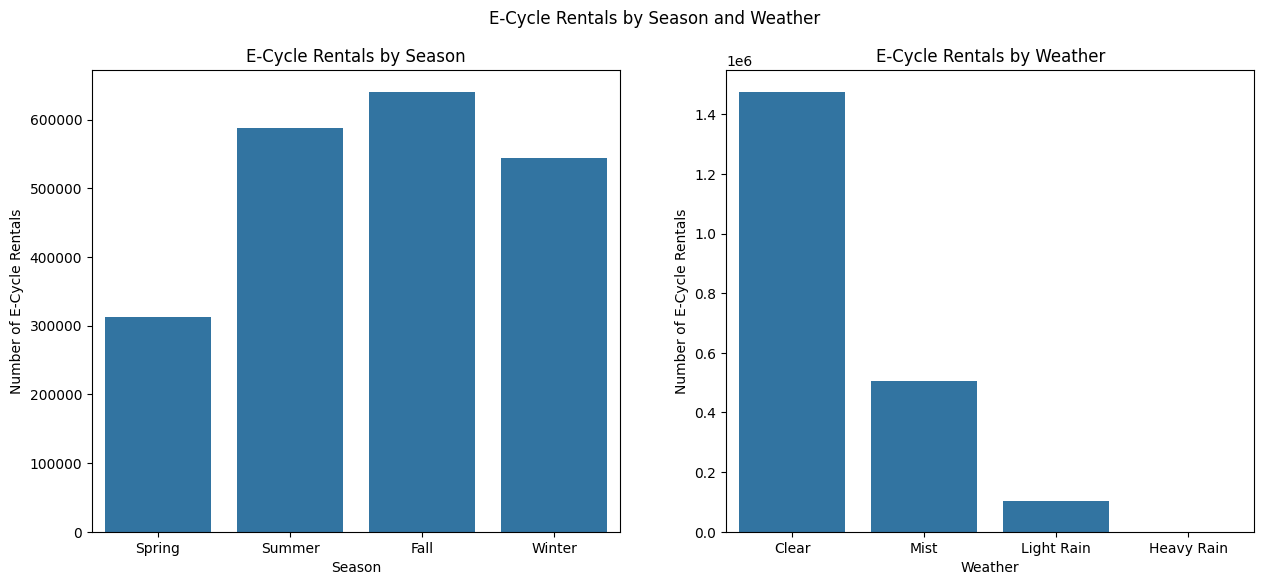

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plotBarPlot(seasonal_counts, 'season', 'count', 'Season', 'Number of E-Cycle Rentals', 'E-Cycle Rentals by Season', ax[0])
plotBarPlot(weather_counts, 'weather', 'count', 'Weather', 'Number of E-Cycle Rentals', 'E-Cycle Rentals by Weather', ax[1])
plt.suptitle("E-Cycle Rentals by Season and Weather")
plt.show()

## **Observations from the Bar Charts:**

- E-Cycle Rentals by Season:

  - Clear Seasonal Variation: There is a distinct seasonal pattern in e-cycle rentals.
  - Summer: Experiences the highest number of rentals, likely due to favorable weather conditions and increased leisure activities.
  - Fall: Shows the second-highest number of rentals, potentially influenced by pleasant weather and the start of the academic year.
  - Spring: Exhibits moderate rental numbers, possibly due to varying weather conditions.
  - Winter: Experiences the lowest number of rentals, likely due to colder temperatures and inclement weather.
- E-Cycle Rentals by Weather:

  - Clear Weather Dominance: Rentals are significantly higher in clear weather conditions, indicating that favorable weather is a major factor driving e-cycle usage.
  - Weather Impact: Mist and light rain conditions result in a noticeable decrease in rentals compared to clear weather.
  - Heavy Rain Detriment: Heavy rain has a substantial negative impact on rentals, with a significantly lower number of rentals observed in such conditions.

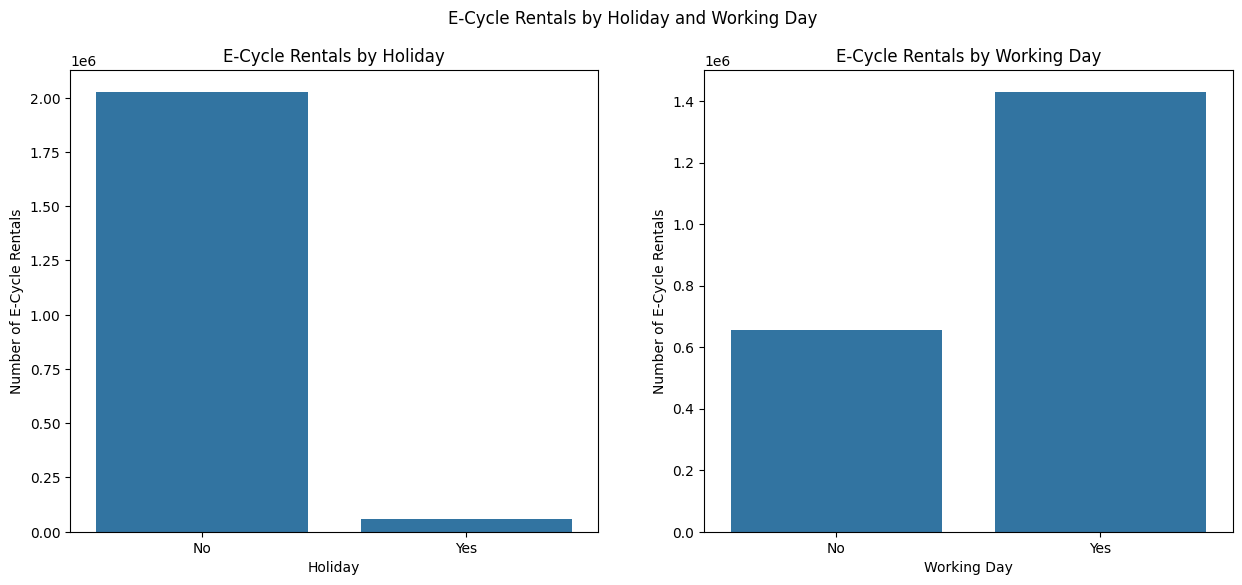

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Using 'holiday' for x in weekend_count
plotBarPlot(weekend_count, 'holiday', 'count', 'Holiday', 'Number of E-Cycle Rentals', 'E-Cycle Rentals by Holiday', ax[0])

# Plot 2: Using 'workingday' for x in workingday_count
plotBarPlot(workingday_count, 'workingday', 'count', 'Working Day', 'Number of E-Cycle Rentals', 'E-Cycle Rentals by Working Day', ax[1])

plt.suptitle("E-Cycle Rentals by Holiday and Working Day")
plt.show()

## **Observations from the Bar Charts:**

- E-Cycle Rentals by Holiday:

  - Significant Drop on Holidays: There is a dramatic decrease in e-cycle rentals on holidays compared to non-holidays. This suggests that a large portion of e-cycle usage is likely driven by commuting and work-related activities, which are significantly reduced during holidays.
- E-Cycle Rentals by Working Day:

  - Higher Rentals on Working Days: A significantly higher number of e-cycle rentals occur on working days compared to non-working days. This further supports the notion that commuting and work-related activities are major drivers of e-cycle usage.

In [27]:
df_seasonal_holiday_registered = df.groupby(['season', 'holiday'])[['registered']].sum().reset_index()
df_seasonal_workingday_registered = df.groupby(['season', 'workingday'])[['registered']].sum().reset_index()
df_seasonal_holiday_casual = df.groupby(['season', 'holiday'])[['casual']].sum().reset_index()
df_seasonal_workingday_casual= df.groupby(['season', 'workingday'])[['casual']].sum().reset_index()

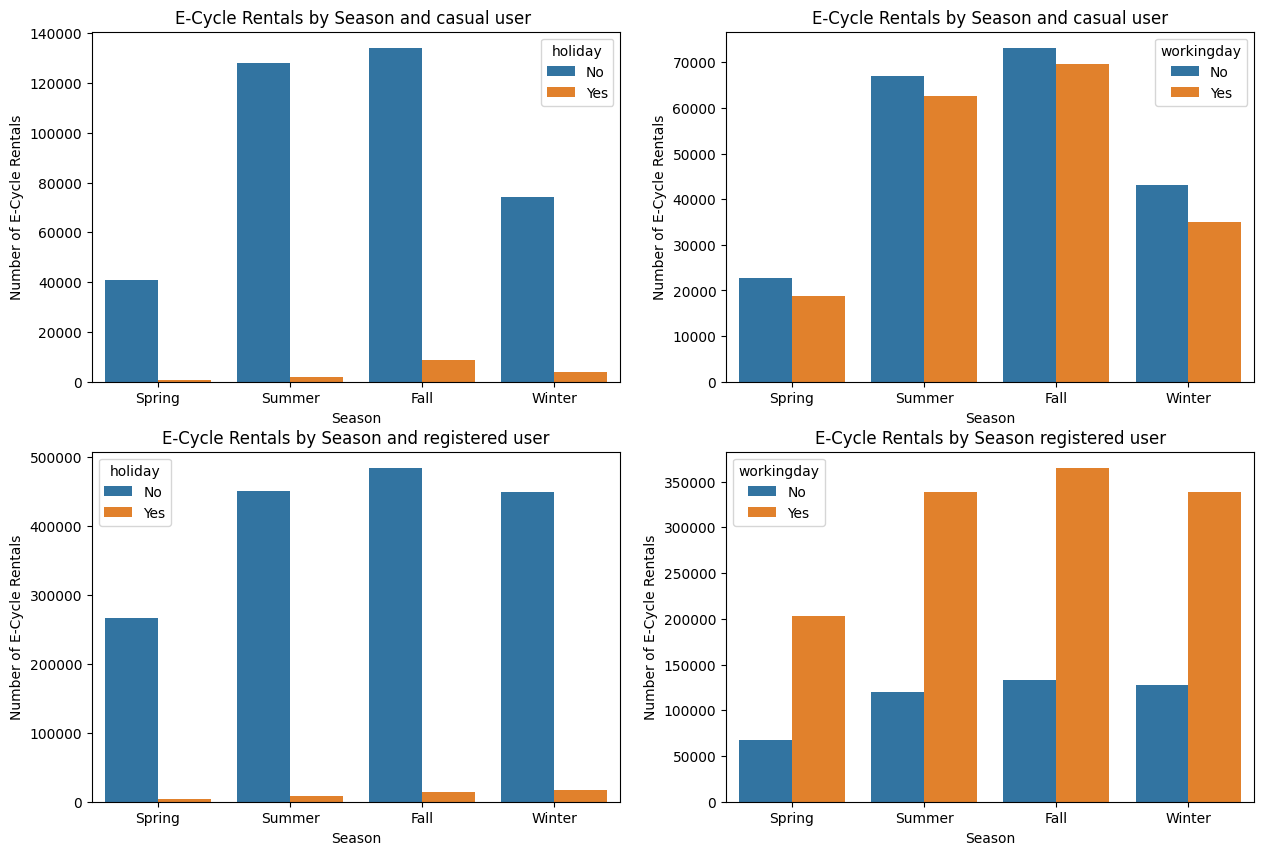

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plotBarPlot(df_seasonal_holiday_casual, 'season', 'casual', 'Season', 'Number of E-Cycle Rentals', 'E-Cycle Rentals by Season and casual user ', axes[0,0],hue='holiday')
plotBarPlot(df_seasonal_workingday_casual, 'season', 'casual', 'Season', 'Number of E-Cycle Rentals', 'E-Cycle Rentals by Season and casual user', axes[0,1],hue='workingday')
plotBarPlot(df_seasonal_holiday_registered, 'season', 'registered', 'Season', 'Number of E-Cycle Rentals', 'E-Cycle Rentals by Season and registered user', axes[1,0],hue='holiday')
plotBarPlot(df_seasonal_workingday_registered, 'season', 'registered', 'Season', 'Number of E-Cycle Rentals', 'E-Cycle Rentals by Season registered user', axes[1,1],hue='workingday')
plt.show()

## **Observations from the Bar Charts:**

- General Patterns:

  - Seasonality: Across all user types (casual and registered) and regardless of holiday or working day status, there's a clear seasonal pattern. Summer consistently sees the highest number of rentals, followed by fall, spring, and winter.
- Casual User Trends:

  - Holiday Impact: On holidays, casual rentals drop significantly across all seasons. This suggests that a large portion of casual riders are leisure users whose activities are impacted by holidays.
  - Working Day Influence: There's a noticeable difference in casual rentals between working days and non-working days. Rentals are higher on non-working days, indicating that leisure activities are a significant driver for casual riders.
- Registered User Trends:

  - Holiday Impact: Registered rentals also decrease on holidays, but the impact is less pronounced compared to casual riders. This suggests that a portion of registered users might still commute or have other essential travel needs even on holidays.
  - Working Day Influence: Registered rentals are significantly higher on working days, reflecting their likely use for commuting and work-related purposes.

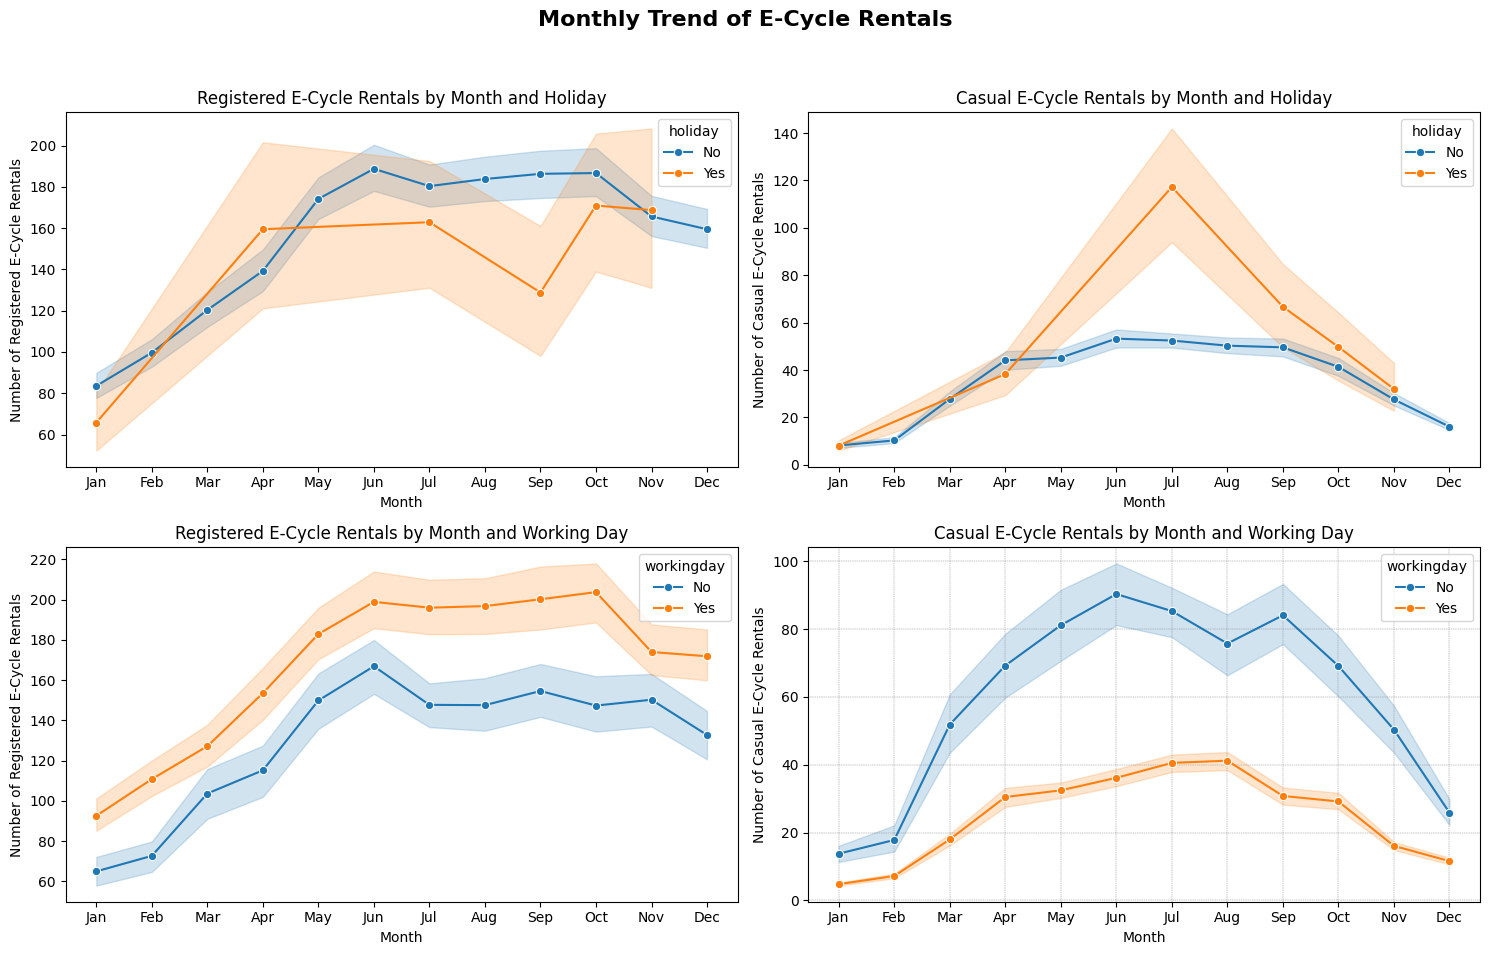

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Registered, by Holiday
plotLinePlot(df, 'month', 'registered', "Month", "Number of Registered E-Cycle Rentals",
             "Registered E-Cycle Rentals by Month and Holiday", axes[0, 0], hue='holiday')

# Plot 2: Casual, by Holiday
plotLinePlot(df, 'month', 'casual', "Month", "Number of Casual E-Cycle Rentals",
             "Casual E-Cycle Rentals by Month and Holiday", axes[0, 1], hue='holiday')

# Plot 3: Registered, by Working Day
plotLinePlot(df, 'month', 'registered', "Month", "Number of Registered E-Cycle Rentals",
             "Registered E-Cycle Rentals by Month and Working Day", axes[1, 0], hue='workingday')

# Plot 4: Casual, by Working Day
plotLinePlot(df, 'month', 'casual', "Month", "Number of Casual E-Cycle Rentals",
             "Casual E-Cycle Rentals by Month and Working Day", axes[1, 1], hue='workingday')


fig.suptitle("Monthly Trend of E-Cycle Rentals", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **Observations from the Line Plots:**

- Overall Trend:

  - Both registered and casual riders exhibit a clear seasonal pattern, with rental numbers generally increasing from winter to summer and then decreasing again. This suggests that weather and seasonal factors significantly influence e-cycle usage.

- Registered Riders:

  - Holiday Impact: On holidays, registered rentals tend to decrease compared to non-holidays, indicating that a portion of registered riders might rely on e-cycles for commuting or work-related purposes.
  - The overall trend of registered rentals remains relatively consistent regardless of holidays.
  - Working Day Impact: Registered rentals are significantly higher on working days compared to non-working days, further emphasizing the role of commuting in registered rider behavior.
- Casual Riders:

  - Holiday Impact: Casual rentals drop significantly on holidays, suggesting that a large proportion of casual riders use e-cycles for leisure activities that are less likely to occur on holidays.
  - Working Day Impact:
Casual rentals are lower on working days compared to non-working days, indicating that leisure activities are more prominent among casual riders.

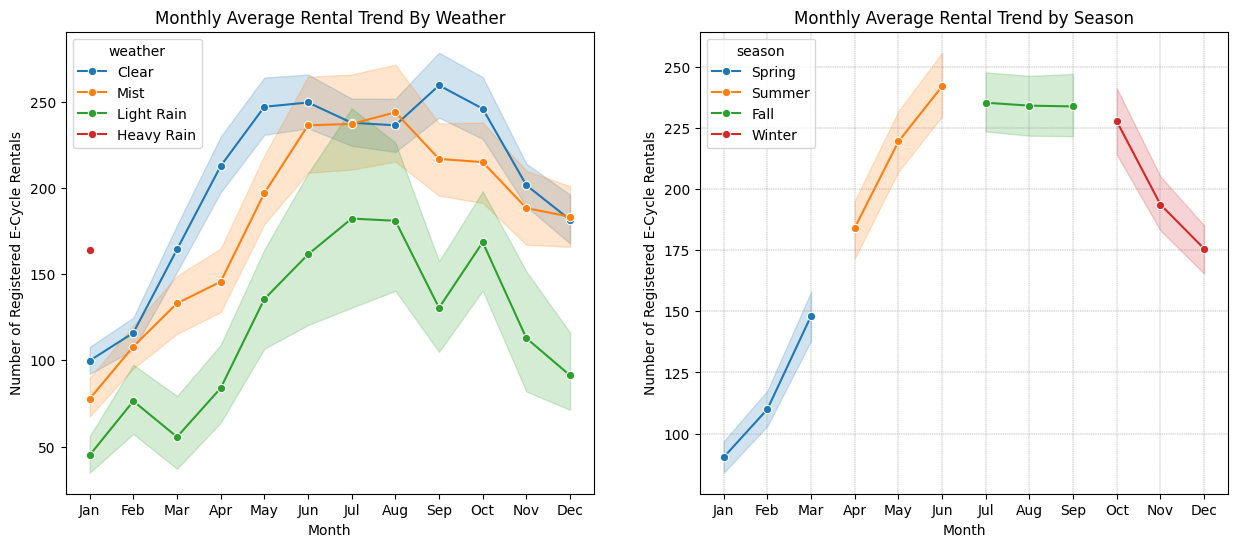

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plotLinePlot(df, 'month', 'count', "Month", "Number of Registered E-Cycle Rentals",
             "Monthly Average Rental Trend By Weather", axes[0], hue='weather')
plotLinePlot(df, 'month', 'count', "Month", "Number of Registered E-Cycle Rentals",
             "Monthly Average Rental Trend by Season", axes[1], hue='season')
plt.show()

## **Observations from the Line Plots:**

- Monthly Average Rental Trend by Weather:

  - Clear Weather Dominance: Rentals are consistently higher in clear weather throughout the year. This is evident in the blue line, which is consistently above the other lines, indicating a strong positive correlation between clear weather and rental demand.
  - Weather Impact: Mist and light rain conditions generally result in lower rental numbers compared to clear weather. Heavy rain has the most significant negative impact, with the lowest rental numbers observed in these conditions.
  - Seasonal Variation within Weather: Even within each weather condition, there's a noticeable seasonal trend. For example, in clear weather, rentals peak during the summer months.
- Monthly Average Rental Trend by Season:

  - Clear Seasonal Trend: There is a clear seasonal pattern in e-cycle rentals. Rentals are highest in the summer, followed by spring and fall, with winter having the lowest rental numbers.
  - Weather Impact within Seasons: The impact of weather varies across seasons. In summer, clear weather has the highest rental numbers, while in winter, the difference between clear weather and other conditions is less pronounced

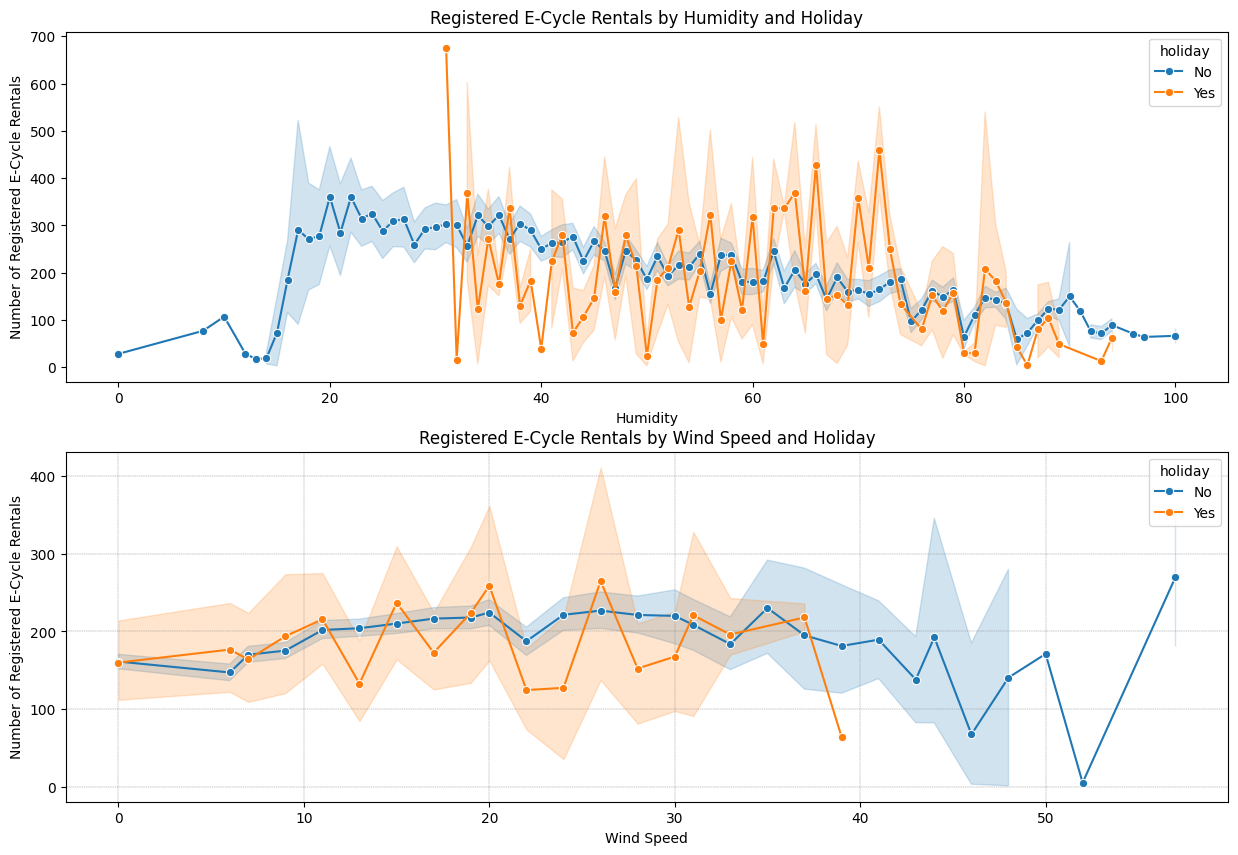

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))


plotLinePlot(df, 'humidity', 'count', "Humidity", "Number of Registered E-Cycle Rentals",
             "Registered E-Cycle Rentals by Humidity and Holiday", axes[0], hue='holiday')

plotLinePlot(df, 'windspeed', 'count', "Wind Speed", "Number of Registered E-Cycle Rentals",
             "Registered E-Cycle Rentals by Wind Speed and Holiday", axes[1], hue='holiday')


plt.show()


## **Observations from the Line Plots:**

- Registered E-Cycle Rentals by Humidity and Holiday:

  - Humidity Impact: There appears to be a complex relationship between humidity and registered rentals. At lower humidity levels, rentals tend to be higher. However, as humidity increases, rental numbers generally decrease.
  - Holiday Impact: On non-holidays, the trend of decreasing rentals with increasing humidity is more pronounced.
  - On holidays, the impact of humidity seems to be less consistent, with more fluctuations in rental numbers across different humidity levels.
- Registered E-Cycle Rentals by Wind Speed and Holiday:

  - Wind Speed Impact: Rentals tend to be higher at lower wind speeds and decrease as wind speed increases. This suggests that strong winds may deter some registered riders.
  - Holiday Impact:
Similar to humidity, the impact of wind speed on rentals seems to be less pronounced on holidays compared to non-holidays.

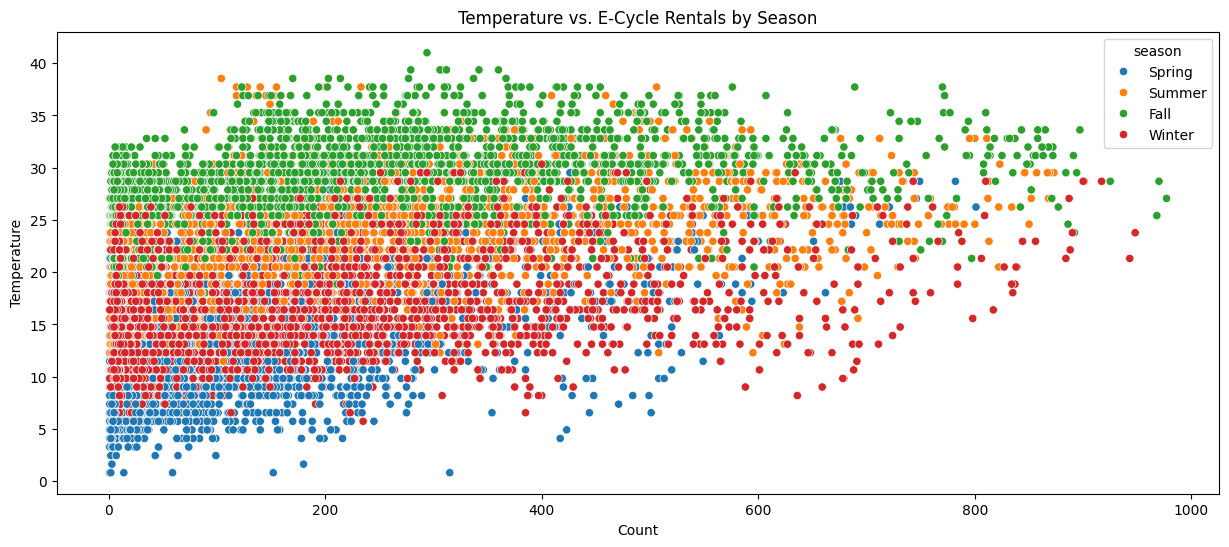

In [32]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df, x='count', y='temp', hue='season', alpha=1)
plt.xlabel('Count')
plt.ylabel('Temperature')
plt.title('Temperature vs. E-Cycle Rentals by Season')
plt.show()


## **Observations from the Scatter Plot:**

- Positive Correlation: There appears to be a positive correlation between temperature and the number of e-cycle rentals across all seasons. As the temperature increases, the number of rentals generally tends to increase as well.
- Seasonality: The data points are clustered based on season, indicating that temperature has different effects on rental demand in different seasons.
  - Spring and Summer: The density of data points is higher at higher temperatures, suggesting that warmer temperatures strongly influence rentals during these seasons.
  - Fall and Winter: The distribution of data points is more spread out, indicating that temperature may have a less pronounced effect on rentals during these seasons. This could be due to factors like lower overall demand in colder months or the influence of other factors like weather conditions (e.g., rain, snow).
- Outliers: There are some outliers, especially at lower temperatures, where the number of rentals is unexpectedly high. These outliers could be due to special events, holidays, or other factors not captured in this visualization.

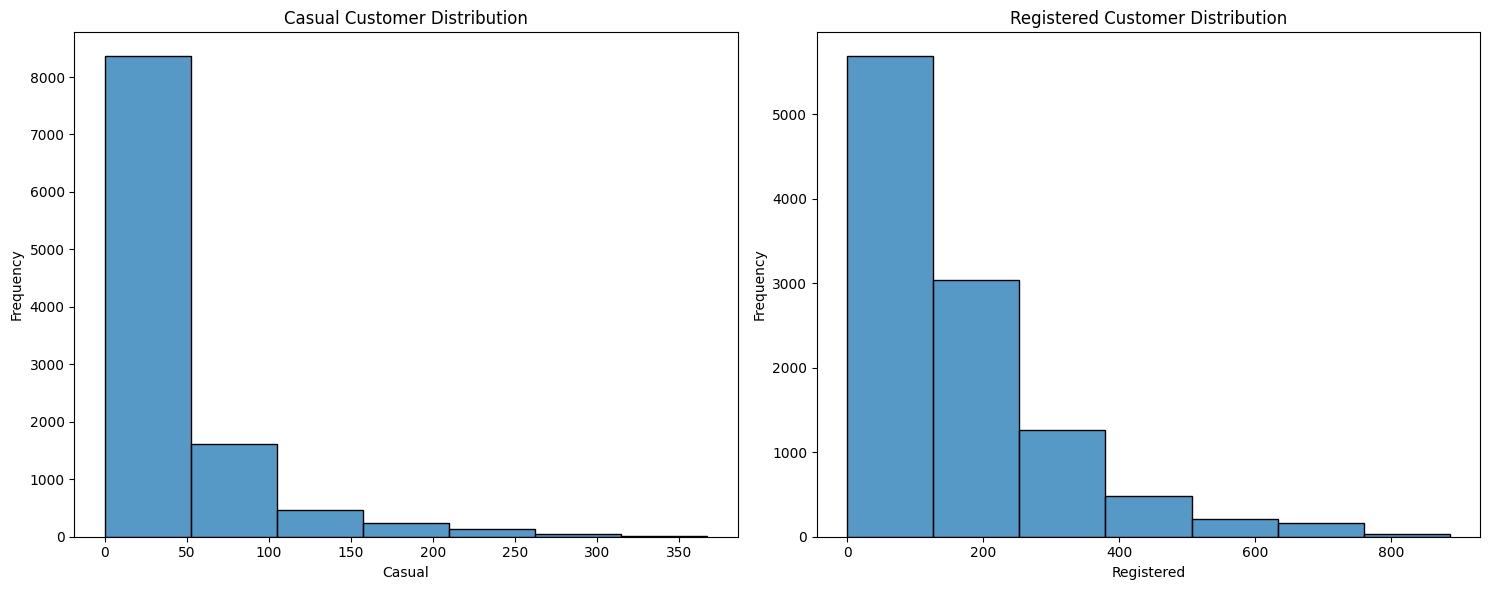

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plotHistogram(df, 'casual', 'Casual Customer Distribution', axes[0])
plotHistogram(df, 'registered', 'Registered Customer Distribution', axes[1])
plt.tight_layout()
plt.show()

## **Observations from the Histograms:**

- Casual Customer Distribution:

  - Right-Skewed: The distribution of casual customer rentals is highly right-skewed. This means there are many rentals with a small number of casual users, and a few rentals with a very large number of casual users.
  - Peak Around 0-50: The majority of casual rentals fall within the 0-50 range, indicating that most trips involving casual users have a relatively small number of riders.
- Registered Customer Distribution:

  - Right-Skewed: Similar to casual users, the distribution of registered customer rentals is also right-skewed.
  - Higher Peak: The peak for registered users is significantly higher compared to casual users, suggesting that a larger number of trips involve a moderate to high number of registered users.

## **Box plot-Visiual Analysis Before Outlier treament**

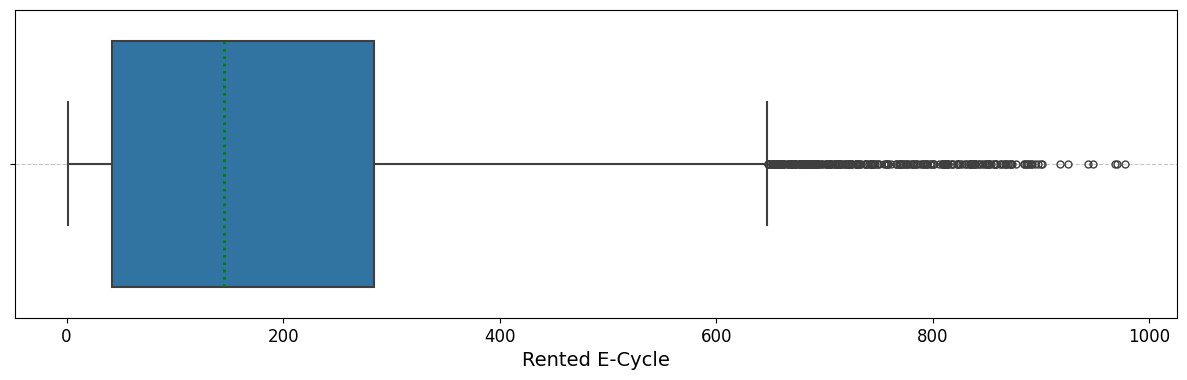

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
plot_purchase_boxplot(df,df['count'],'Rented E-Cycle','',axes)

## **Observations from the Box Plot:**

- Right Skewness: The box plot clearly indicates that the distribution of "Rented E-Cycles" is highly skewed to the right. This means that there are a large number of rentals with lower values (within the box and whisker range), but also a significant number of outliers with very high rental counts.

- Outliers: The presence of numerous data points beyond the upper whisker suggests the existence of a considerable number of outliers in the data. These outliers could represent extreme events or unusual circumstances that significantly impacted rental demand.

- Median: The median value (represented by the line within the box) appears to be relatively low, further emphasizing the right-skewed nature of the distribution.

# **Outlier Analsys**

In [35]:
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
IQR = Q3 - Q1
count_lower_bound = Q1 - 1.5 * IQR
count_upper_bound = Q3 + 1.5 * IQR
print(f"Income Upper Bound: {count_upper_bound}, Income Lower Bound: {count_lower_bound}")
is_outlier_upper = count_upper_bound < df['count'].max()
is_outlier_lower = count_lower_bound > df['count'].min()
print(f"Is the value exceeding the upper bound limit? {is_outlier_upper}")
print(f"Is the value falling below the lower bound limit? {is_outlier_lower}.")
print('---'*30)

Income Upper Bound: 647.0, Income Lower Bound: -321.0
Is the value exceeding the upper bound limit? True
Is the value falling below the lower bound limit? False.
------------------------------------------------------------------------------------------


## **Observations from the Code and Output:**

- Outlier Detection: we have implemented the IQR (Interquartile Range) method to detect outliers in the 'count' column (which likely represents the number of e-cycle rentals).

- In this specific case, the output indicates that there are values exceeding the upper bound limit, suggesting the presence of outliers in the data.


In [36]:
clean_df = df[(df['count'] >= count_lower_bound) & (df['count'] <=count_upper_bound)]

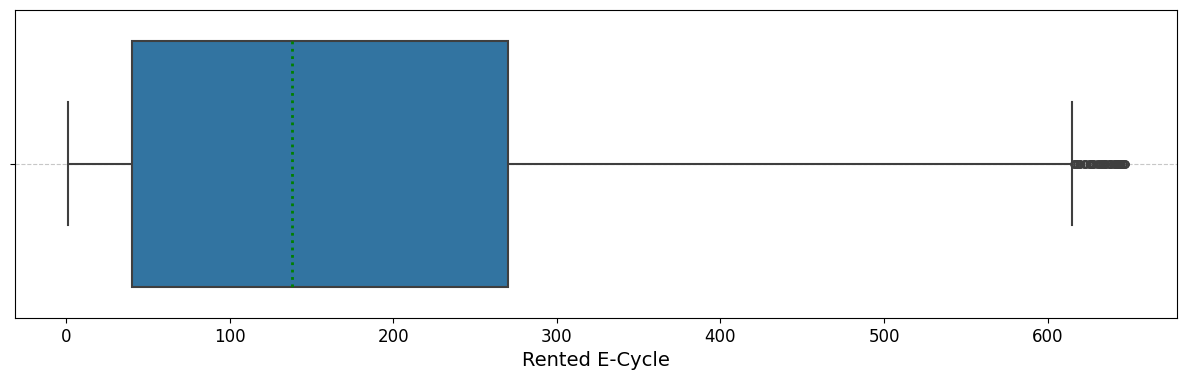

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
plot_purchase_boxplot(clean_df,clean_df['count'],'Rented E-Cycle','',axes)

## **Observations from the Box Plot:**

- Distribution: The box plot reveals a right-skewed distribution of "Rented E-Cycles." This means there are a large number of rentals with lower values (within the box and whisker range), but also a significant number of outliers with very high rental counts.
- Outliers: The presence of numerous data points beyond the upper whisker suggests the existence of a considerable number of outliers in the data. These outliers could represent extreme events or unusual circumstances that significantly impacted rental demand.
- Median: The median value (represented by the line within the box) appears to be relatively low, further emphasizing the right-skewed nature of the distribution.
- IQR (Interquartile Range): The box represents the interquartile range (IQR), which is the range between the 25th and 75th percentiles. The width of the box gives an indication of the spread of the middle 50% of the data.

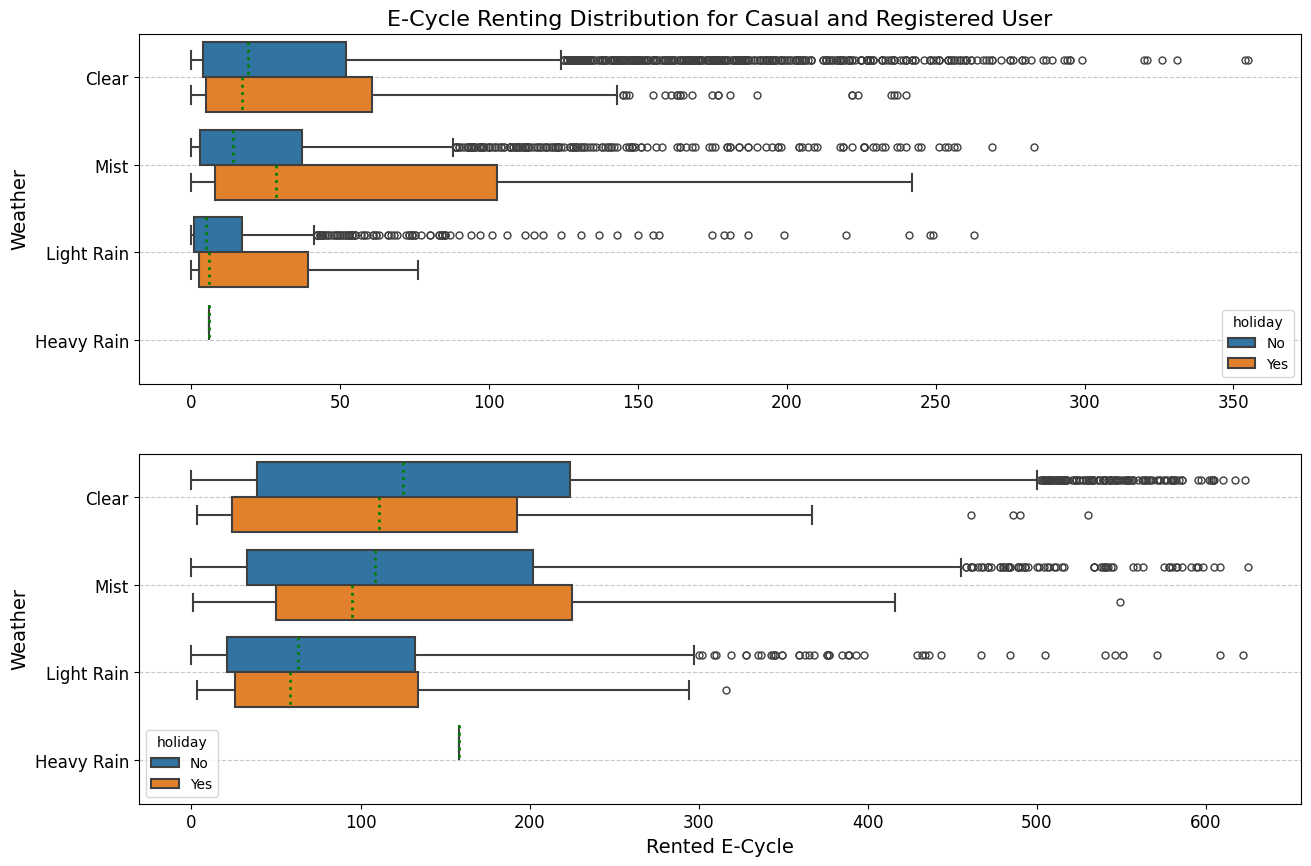

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
plot_purchase_boxplot(clean_df,clean_df['casual'],'','E-Cycle Renting Distribution for Casual and Registered User',axes[0],'weather','Weather','holiday')
plot_purchase_boxplot(clean_df,clean_df['registered'],'Rented E-Cycle','',axes[1],'weather','Weather','holiday')

## **Observations from the Box Plots:**

- Weather Impact on Rentals:

  - Clear Weather: Rentals are generally higher in clear weather conditions compared to mist, light rain, and heavy rain. This is evident in the longer boxes and higher median values for the "Clear" weather condition.
  - Heavy Rain: Rentals are significantly lower in heavy rain compared to other weather conditions. This is reflected in the shorter box and lower median value for the "Heavy Rain" category.
  - Outliers: There are numerous outliers, especially in clear weather conditions, indicating the presence of some days with exceptionally high rental numbers. These outliers could be due to various factors such as special events, weekends, or other unanticipated factors.
- Holiday Impact:

  - Non-Holiday Rentals: On non-holidays, the distribution of rentals across different weather conditions appears to be similar to the overall trend. Clear weather still sees higher rentals, while heavy rain has the lowest.
  - Holiday Rentals: On holidays, the difference in rentals between clear weather and other conditions seems to be less pronounced. This suggests that weather conditions may have a slightly lesser impact on rental demand during holidays.

<Axes: xlabel='atemp', ylabel='Density'>

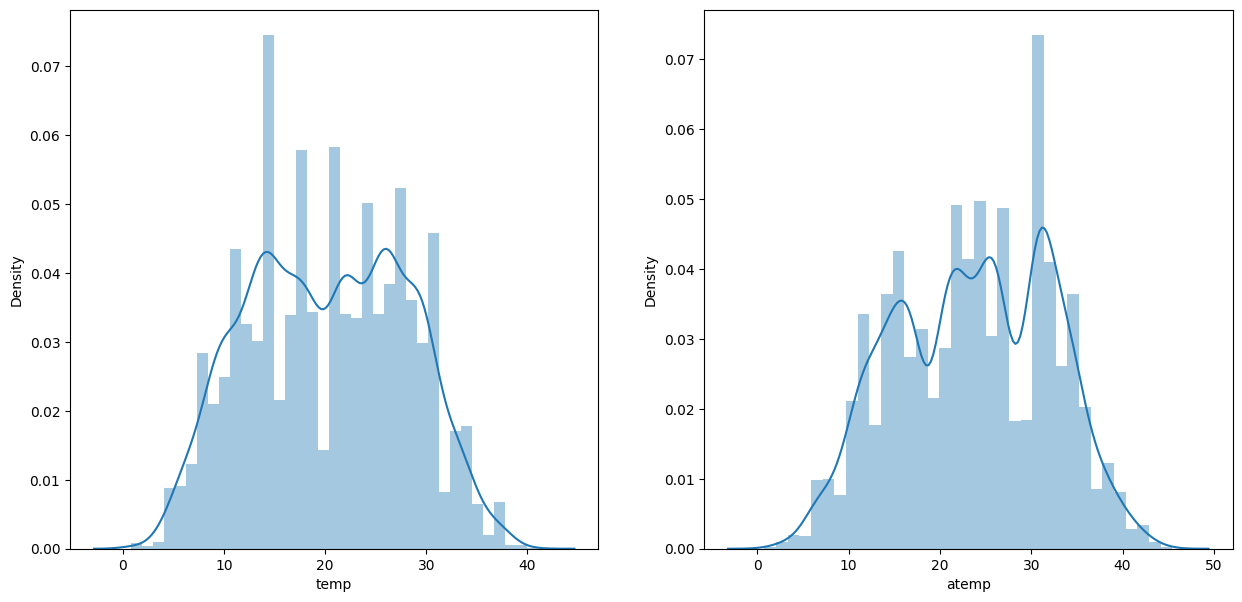

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df["temp"], ax=axes[0])
sns.distplot(df["atemp"], ax=axes[1])

## **Observations from the Histograms:**

- Distribution of Temperature (temp):

  - Shape: The distribution of temperature appears to be approximately normal (bell-shaped) with a slight right skew.
  - Range: The temperature values range from around 0 to 40 degrees, which is expected for typical weather conditions.
- Distribution of "Feels Like" Temperature (atemp):

  - Shape: Similar to the actual temperature, the distribution of "feels like" temperature also appears to be approximately normal with a slight right skew.
  - Range: The range of "feels like" temperature is also within a reasonable range, likely reflecting the influence of factors like humidity and wind on perceived temperature.

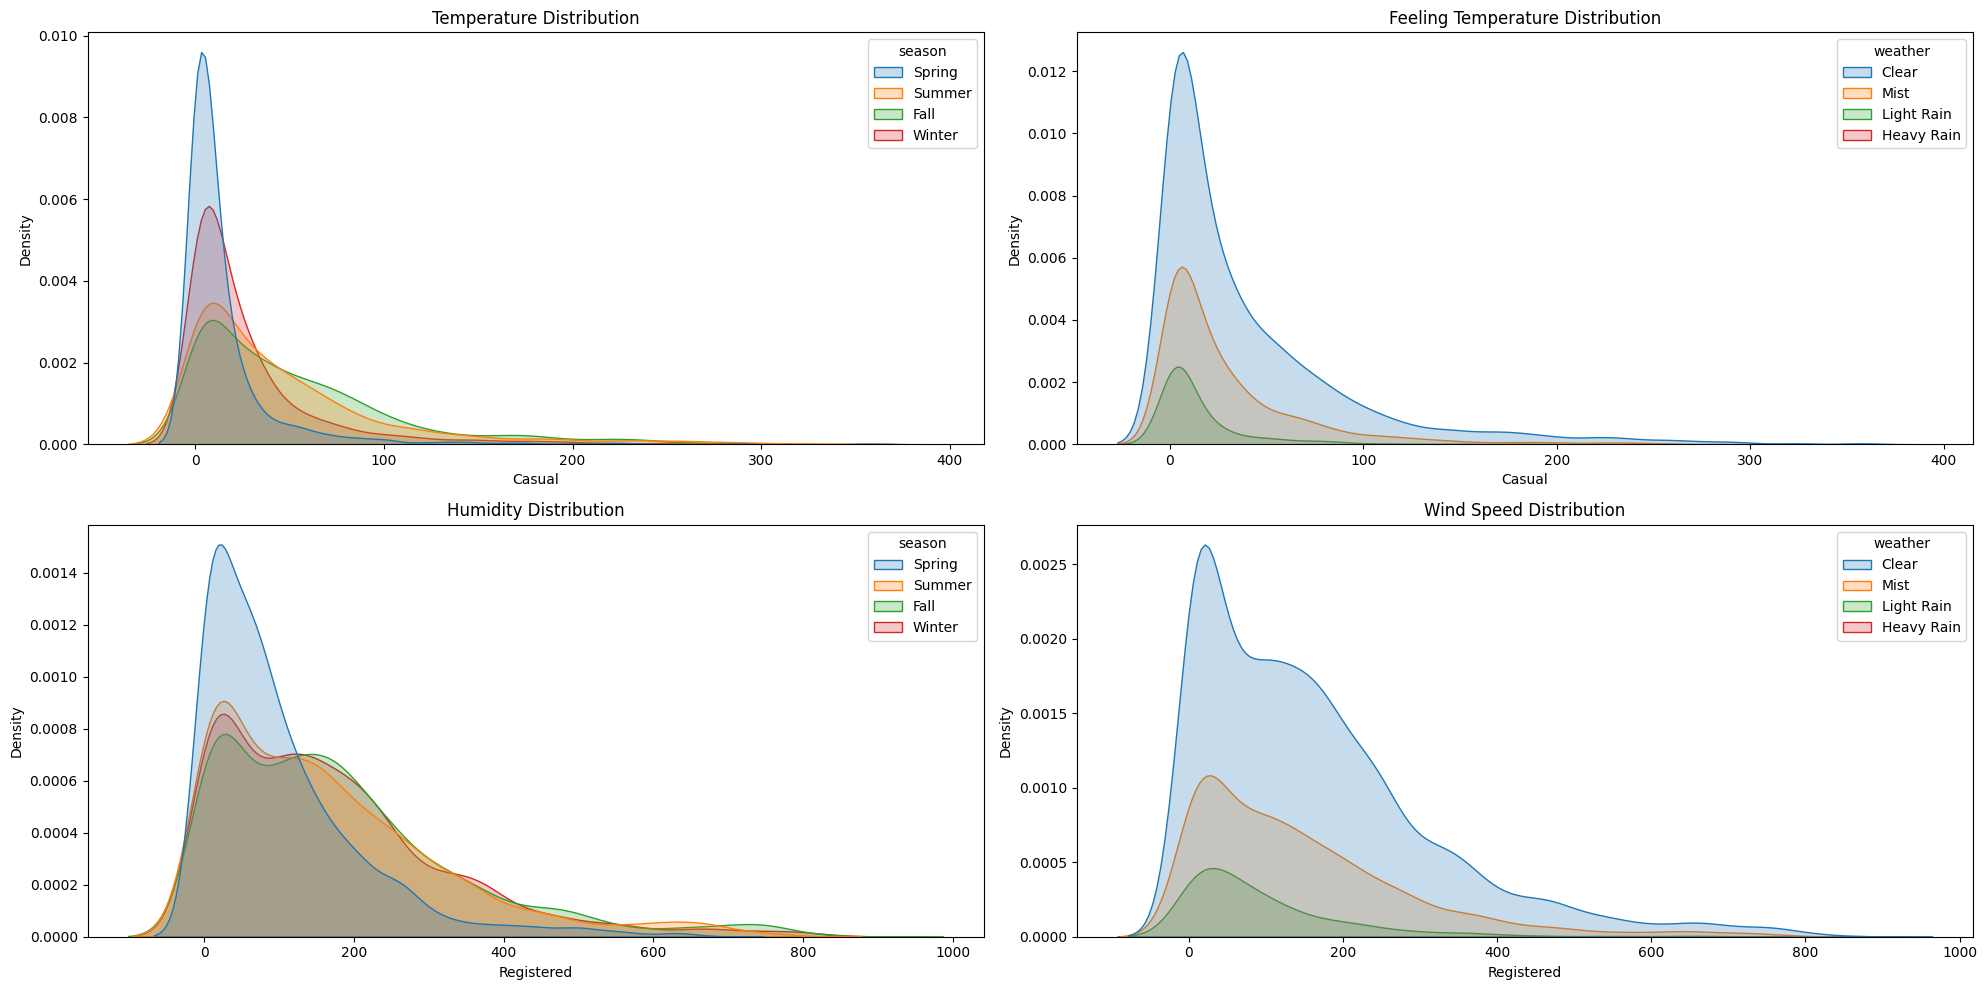

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plotKDE(df, 'casual', 'Temperature Distribution', axes[0, 0],hue='season')
plotKDE(df, 'casual', 'Feeling Temperature Distribution', axes[0, 1],hue='weather')
plotKDE(df, 'registered', 'Humidity Distribution', axes[1, 0],hue='season')
plotKDE(df, 'registered', 'Wind Speed Distribution', axes[1, 1],hue='weather')
plt.tight_layout()
plt.show()

## **Observations from the Density Plots:**

- Temperature Distribution:

  - Seasonality: The distribution of temperature varies across seasons. Spring and Summer exhibit higher temperatures compared to Fall and Winter.
  - Shape: The distribution of temperature within each season appears to be approximately normal with some skewness.
- Feeling Temperature Distribution:

  - Seasonality: Similar to temperature, "feeling temperature" (atemp) also shows seasonal variation. Spring and Summer have higher "feels like" temperatures compared to Fall and Winter.
  - Weather Influence: The "feeling temperature" distributions differ across weather conditions. Clear weather tends to have higher "feels like" temperatures compared to mist, light rain, and heavy rain.
- Humidity Distribution:

  - Seasonality: Humidity levels appear to be higher in the summer and fall compared to spring and winter.
  - Shape: The distribution of humidity is slightly right-skewed, indicating that there are more days with lower humidity compared to higher humidity levels.
- Wind Speed Distribution:

  - Shape: The distribution of wind speed appears to be right-skewed, with a larger proportion of days having lower wind speeds.
  - Weather Influence: Wind speed distributions differ across weather conditions. Clear weather tends to have higher wind speeds compared to mist, light rain, and heavy rain.

<Axes: xlabel='month', ylabel='count'>

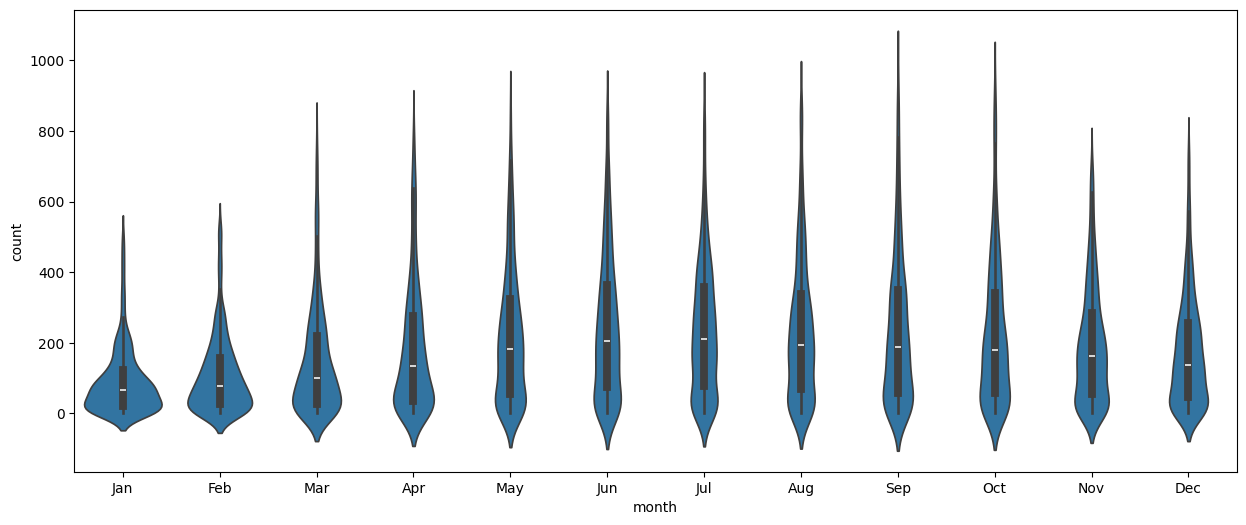

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.violinplot(data=df, x="month", y="count")

## **Observations from the Violin Plot:**

- Clear Seasonality: The violin plot vividly illustrates a strong seasonal pattern in e-cycle rentals. The "violin" shapes are taller and wider for months like June and July, indicating higher rental counts and greater variability during these months. In contrast, months like January and December have narrower "violins," suggesting lower rental counts and less variability.

- Distribution within Months: The violin plot also shows the distribution of rental counts within each month. The wider parts of the "violin" indicate a larger spread of rental values, while narrower parts suggest a more concentrated range of values. This visual representation helps understand the variability of rentals within each month.

<Axes: xlabel='month', ylabel='count'>

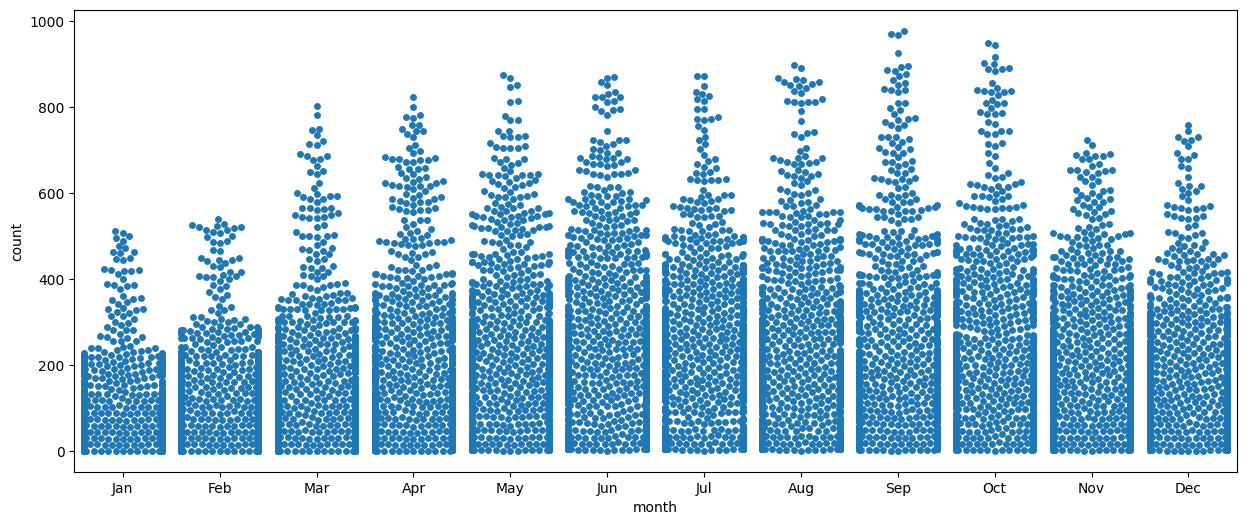

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.swarmplot(data=df, x="month", y="count")

## **Observations from the Swarm Plot:**

- Clear Seasonality: The swarm plot visually confirms a strong seasonal pattern in e-cycle rentals. The density of data points is significantly higher during the summer months (June-August), indicating a higher number of rentals compared to other months.
- Monthly Variation: There is considerable variation in rental counts within each month. The swarm plot shows a wide range of rental values for each month, suggesting that factors other than just the month itself (e.g., weather, day of the week, special events) influence rental demand.
Potential Outliers: The swarm plot might also reveal potential outliers, which are data points that are significantly separated from the main cluster of data points within a particular month. These outliers could represent unusual events or anomalies that require further investigation.

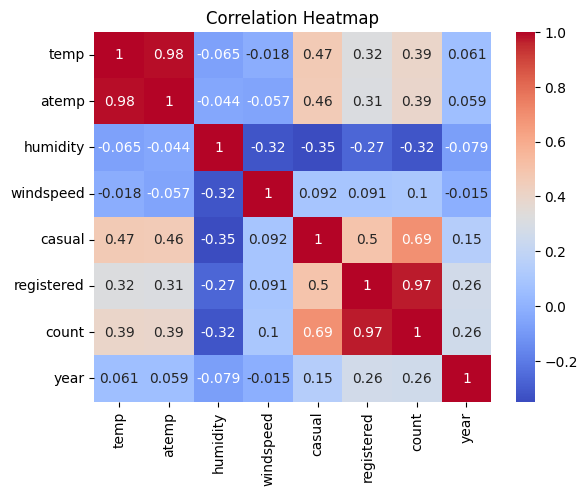

In [43]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Observations from the Correlation Heatmap:**

- Strong Positive Correlations:

  - temp and atemp: These two variables have a very strong positive correlation (0.98). This is expected as "feels like" temperature (atemp) is closely related to actual temperature (temp).
  - casual and count: A strong positive correlation (0.69) exists between casual riders and the total number of rentals (count).
  - registered and count: A very strong positive correlation (0.97) exists between registered riders and the total number of rentals (count). This indicates that registered riders have a significant impact on the overall rental count.
- Moderate Positive Correlations:

  - temp and count: A moderate positive correlation (0.39) exists between temperature and the total number of rentals. This suggests that higher temperatures are generally associated with increased rental demand.
  - atemp and count: A moderate positive correlation (0.39) exists between "feels like" temperature and the total number of rentals.
- Negative Correlations:

  - humidity and most variables: Humidity shows moderate negative correlations with temp, atemp, casual, registered, and count. This suggests that higher humidity levels may be associated with a decrease in rental demand.
  - windspeed and count: A weak negative correlation exists between wind speed and the total number of rentals. This could indicate that strong winds might deter some riders.
- Other Observations:

  - Year: The year variable has relatively weak correlations with most other variables, suggesting a limited impact on the overall rental patterns.

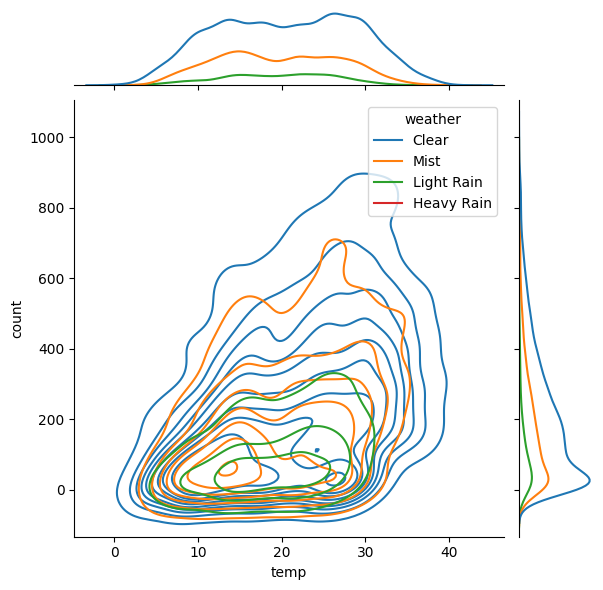

In [44]:
sns.jointplot(data=df, x='temp', y='count', kind='kde',hue ='weather')
plt.show()

## **Observations from the Density Plot:**

- Clear Weather Dominance: The density plot for "Clear" weather shows a wider spread and higher peak compared to other weather conditions. This suggests that in clear weather, there's a broader range of rental counts, with a higher concentration around a certain peak value.

- Impact of Adverse Weather: The density plots for "Mist," "Light Rain," and "Heavy Rain" show a narrower range and lower peak values compared to "Clear" weather. This indicates that adverse weather conditions tend to limit the range of rental counts, with a lower overall demand.

- Relationship between Temperature and Rentals: The shape of the density curves suggests that the relationship between temperature and rental counts might vary depending on the weather condition. In clear weather, there might be a stronger positive relationship between temperature and rentals compared to other weather conditions.

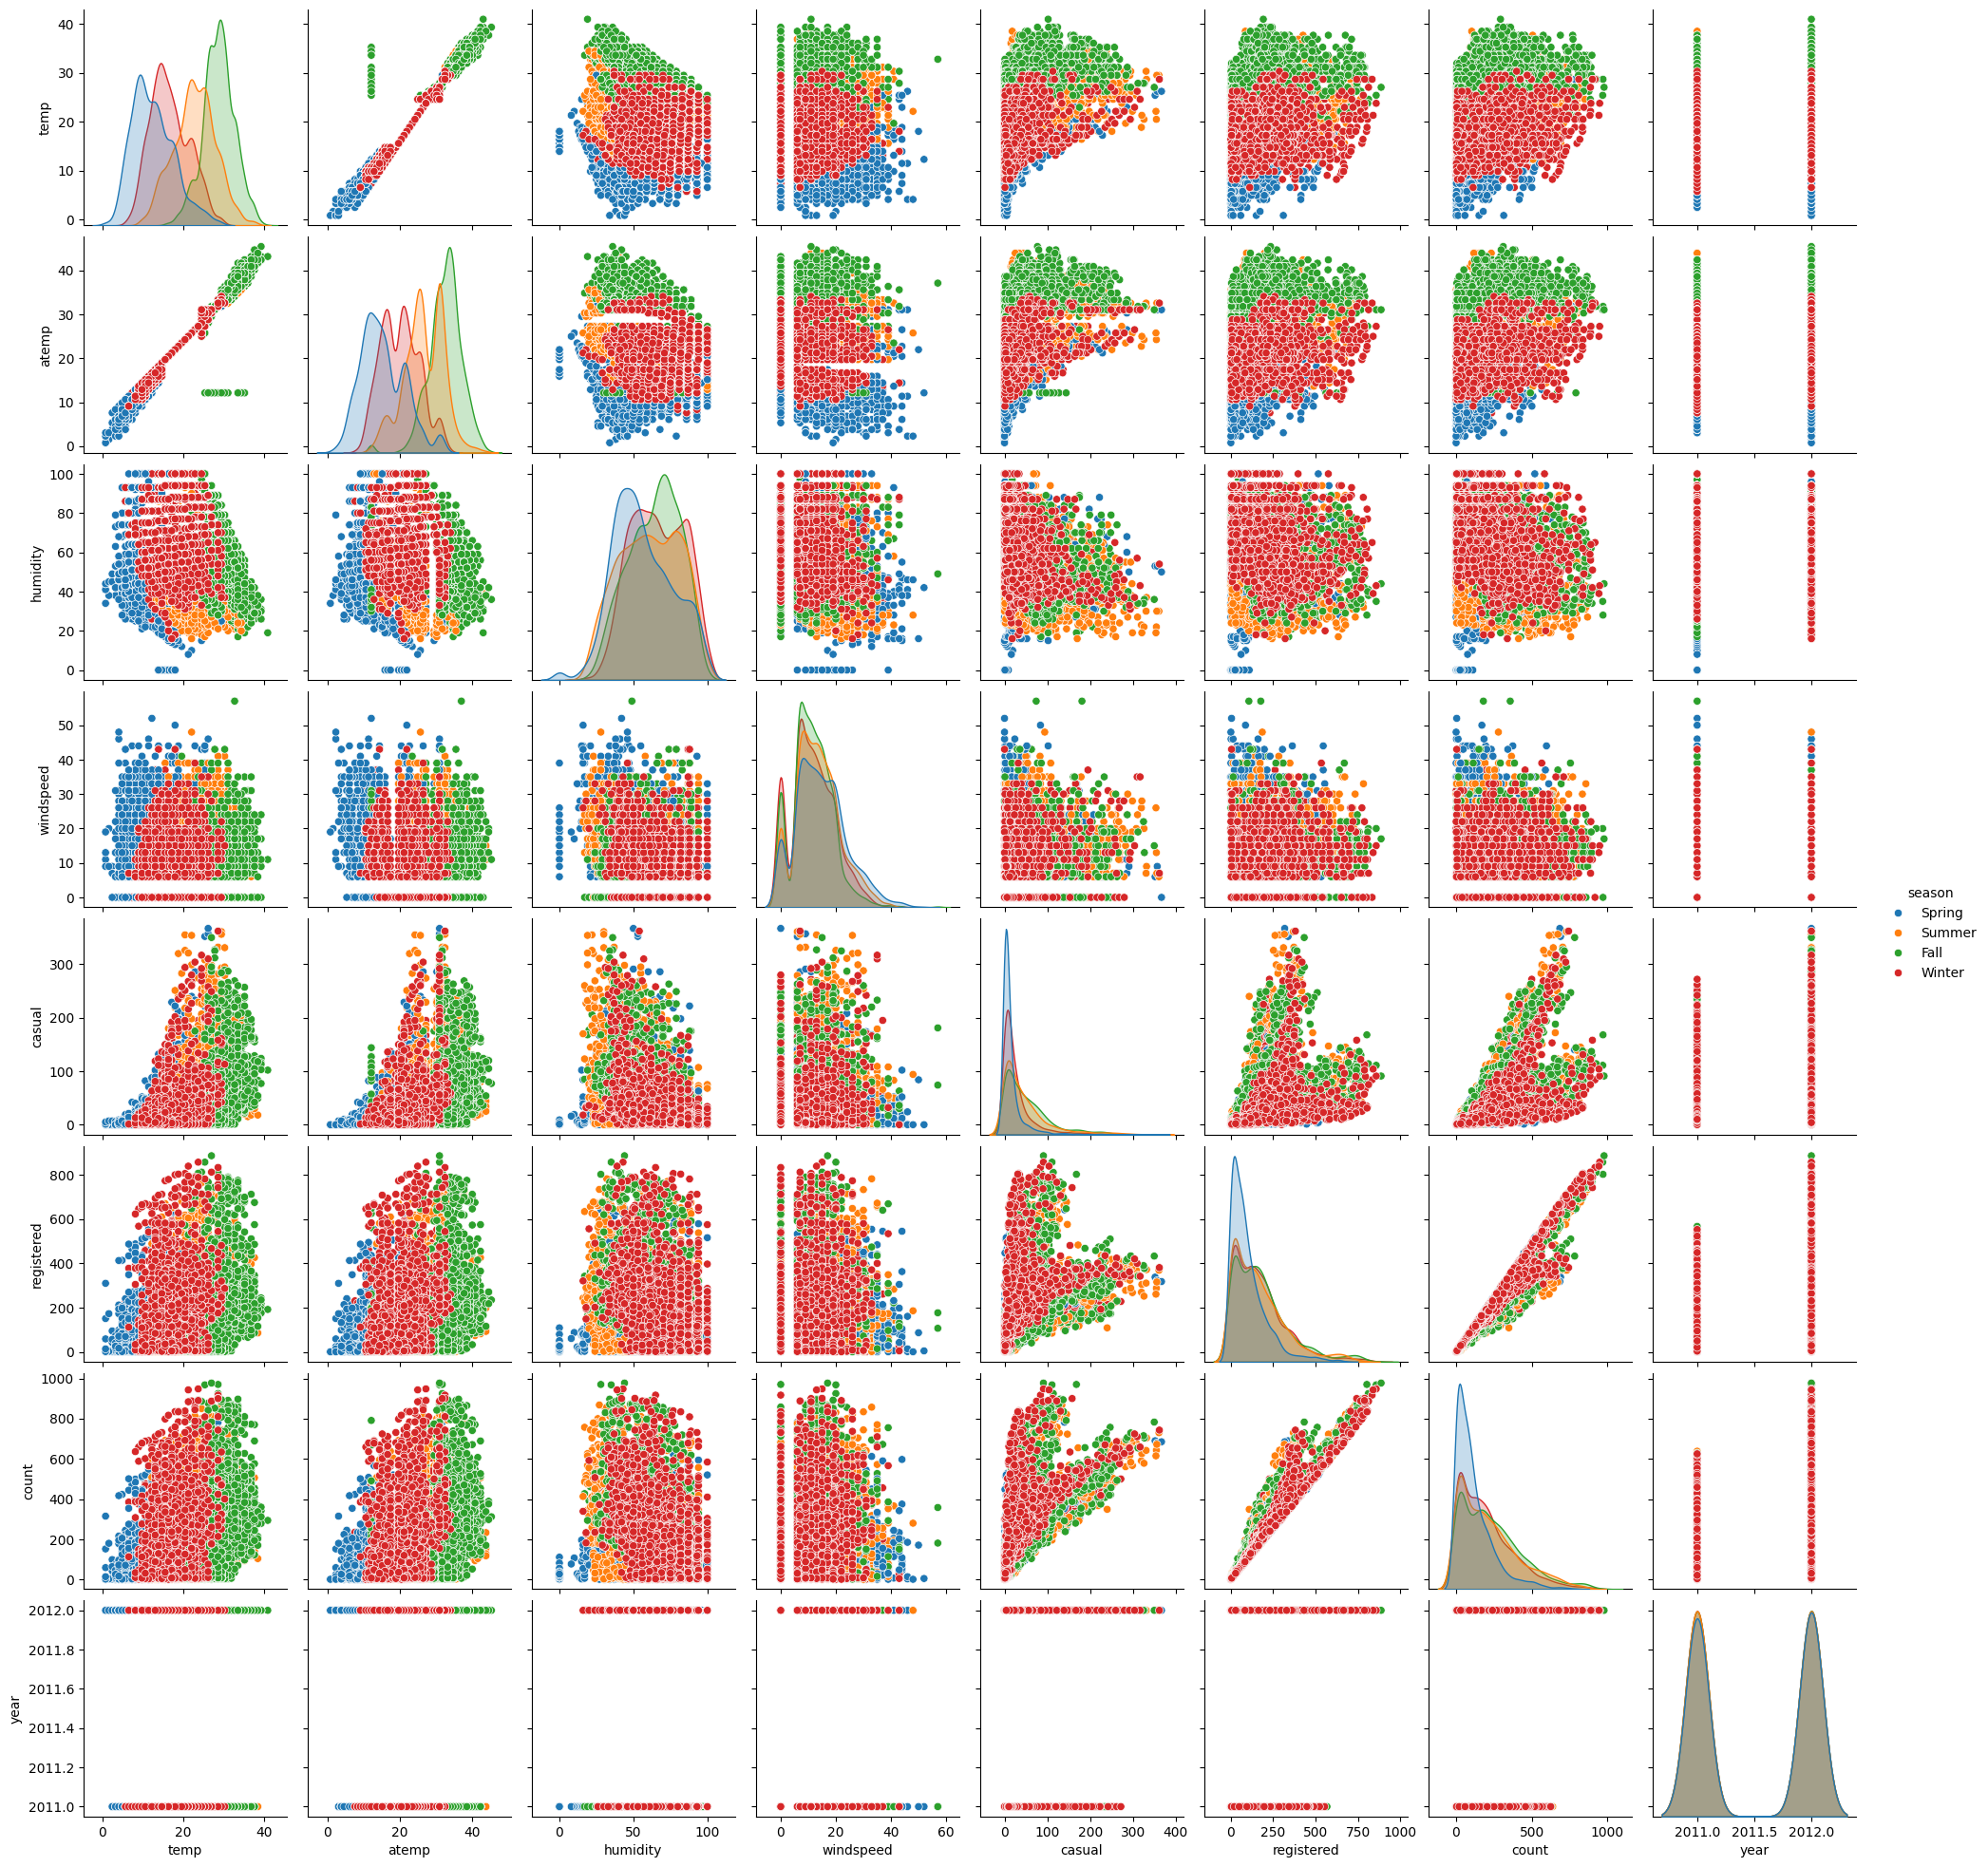

In [45]:
sns.pairplot(df,hue='season')
plt.show()

## **Observations from the Pair Plot:**

- Relationships between Variables:

  - Strong Correlation between Temp and Atemp: The scatter plot for 'temp' vs. 'atemp' shows a strong linear relationship, indicating a high correlation between actual temperature and "feels like" temperature. This is expected as "feels like" temperature is influenced by factors like humidity and wind.

  - Seasonality: The density plots along the diagonal for 'season' show distinct distributions for each season. This visually confirms the seasonal patterns observed earlier, with different distributions of variables like temperature, humidity, and wind speed across seasons.

  - Weather Influence: The scatter plots between 'weather' and other variables (like 'temp', 'atemp', 'humidity') show how these variables are influenced by weather conditions. For instance, 'temp' and 'atemp' tend to be higher in clear weather compared to mist, light rain, and heavy rain.

  - Rental Count Distributions: The density plots for 'casual', 'registered', and 'count' show the distribution of these variables. The distributions for 'casual' and 'registered' are right-skewed, indicating that a larger proportion of trips involve a smaller number of riders.

- Potential Outliers: Some scatter plots show potential outliers, which are data points that deviate significantly from the general trend. These outliers could be due to various factors such as unusual events, data entry errors, or measurement inaccuracies.

## **Hypothesis Testing**

Question 1. Is there any effect of Working Day on the number of electric cycles rented ?

#### **Step-1: Set Up Null Hypothesis**
- Null Hypothesis(Ho): There is no effect of working day on the number of electric cycle rented mu1=mu2
- Alternate Hypothesis (Ha):  There is effect of working day on the number of electric cycle rented mu1!=mu2

#### **STEP-2 : Checking for basic assumpitons for the hypothesis**
   

In [46]:
working_day_count= df.loc[df["workingday"]=='Yes',"count"]
non_working_day_count=df.loc[df["workingday"]=='No',"count"]

In [47]:
#Mean and Standard Deviation of count during working day
working_day_count.mean(), working_day_count.std()

(193.01187263896384, 184.5136590421481)

In [48]:
#Mean and Standard Deviation of count during Non-working day
non_working_day_count.mean(), non_working_day_count.std()

(188.50662061024755, 173.7240153250003)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


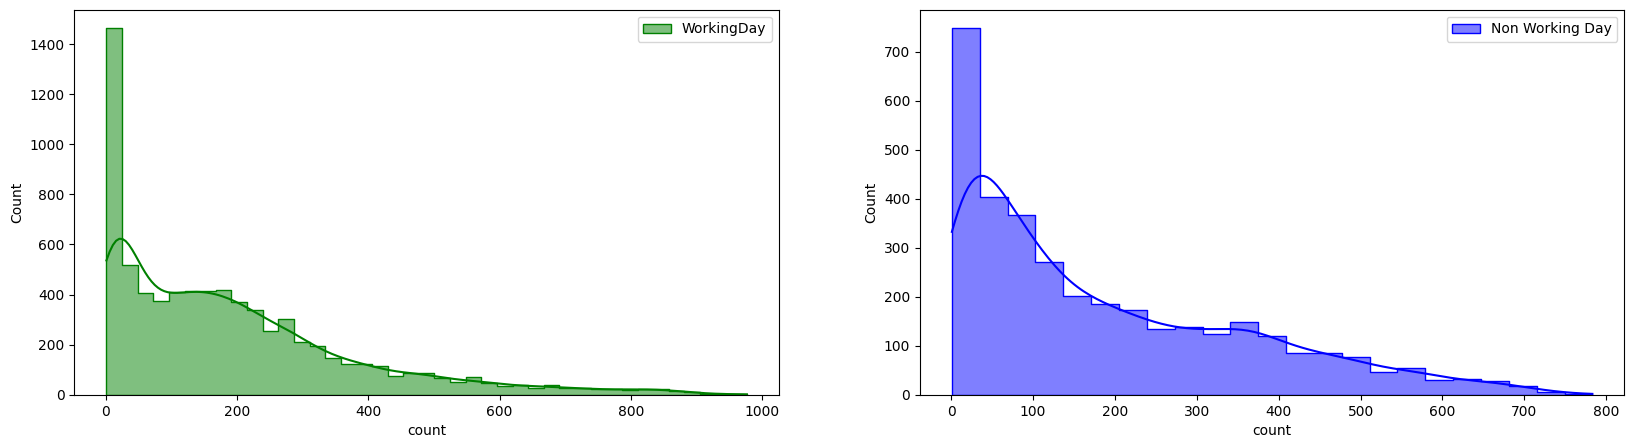

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
plot_hist_plot(working_day_count,'WorkingDay','green',axes[0])
plot_hist_plot(non_working_day_count,'Non Working Day','blue',axes[1])
plt.show()

## **Observations from the Histograms:**

- Distribution on Working Days:
  - The distribution of rental counts on working days appears to be right-skewed. This suggests that there are a large number of days with relatively low rental counts, and a smaller number of days with very high rental counts.
  - The peak of the distribution is towards the lower end of the rental count range, indicating that a majority of working days have moderate to low rental numbers.
- Distribution on Non-Working Days:

  - The distribution of rental counts on non-working days also exhibits a right-skewed pattern.
  - However, compared to working days, the peak of the distribution is shifted towards higher rental counts. This indicates that while there are still many days with lower rentals, there is a greater proportion of days with high rental counts on non-working days.

## **QQ Plot for Normality Check**

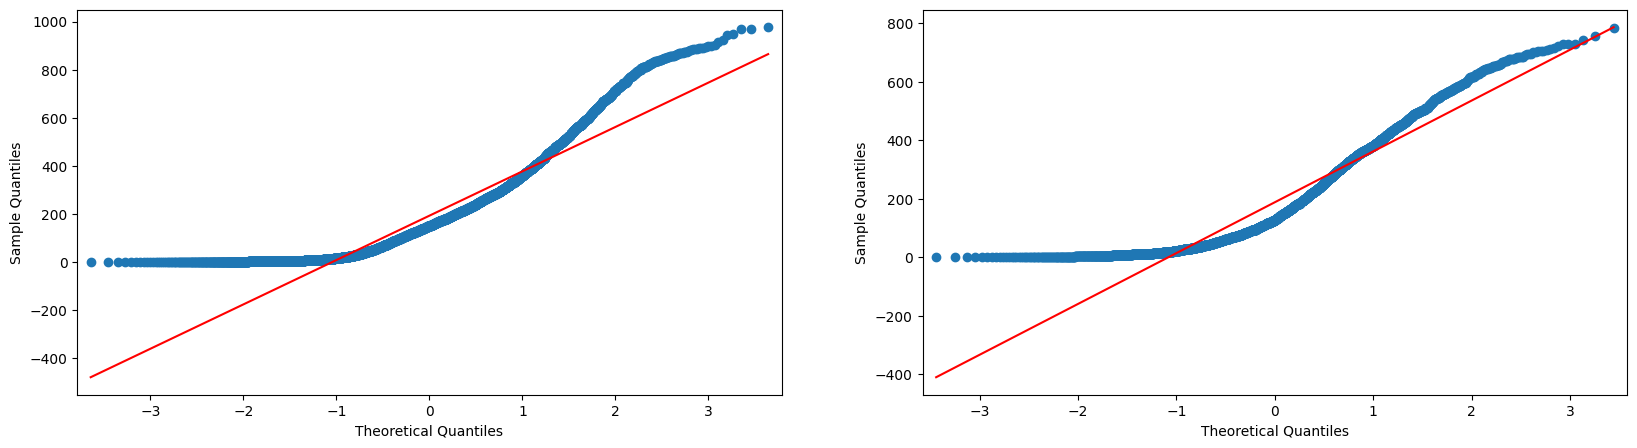

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
qqplot(working_day_count, line='s', ax=axes[0])
qqplot(non_working_day_count, line='s', ax=axes[1])
plt.show()
plt.show()

## **Observations from the Q-Q Plots:**

- Non-Normal Distribution: Both Q-Q plots show a significant deviation from the expected diagonal line, indicating that the data is not normally distributed.

- Right Skewness: The points in both plots tend to curve upwards towards the right tail, suggesting a right-skewed distribution for both "working day" and "non-working day" rental counts. This is consistent with our previous observations about the distribution of rental counts.

- Outliers: The presence of points far from the diagonal line in both plots indicates the presence of potential outliers in the data. These outliers could be due to specific events or anomalies that significantly impacted rental demand.

## **Step-2 Let us set siginificance level 0.05, confidence level 95%**

In [51]:
alpha=0.05

#### **Since the samples are not normally distributed, the t-test, which assumes normality, cannot be applied directly. In such cases, we can perform its non-parametric equivalent, the Mann-Whitney U test, to compare the distributions of two independent samples.**

In [52]:
statistic, p_value_mannwhite = mannwhitneyu(working_day_count, non_working_day_count , alternative='two-sided')
statistic, p_value_mannwhite

(12868495.5, 0.9679139953914079)

## Step-4 **Compare P-Value**

In [53]:
print('Conculsion:')
if p_value_mannwhite > alpha:
  print('Accepting Null Hypothesis')
  print('suggests that there is no effect of working day on the number of electric cycle rented')
else:
  print('Rejecting Null Hypothesis')
  print('suggests that there is an effect of working day on the number of electric cycle rented')

Conculsion:
Accepting Null Hypothesis
suggests that there is no effect of working day on the number of electric cycle rented


Question 2. Is No. of cycles rented is similar or different in different 1. weather 2. season ?

#### **Step-1: Set Up Null Hypothesis**
- Null Hypothesis(Ho): The distribution of the number of cycles rented is the same across different groups (weather conditions or seasons).
- Alternate Hypothesis (Ha):  At least one group has a significantly different distribution of cycle rentals.

#### **STEP-2 : Checking for basic assumpitons for the hypothesis**
   

## 2a: **Asummption And Hypothesis for Weather**

In [54]:
weather_groups = [df[df['weather'] == w][['count','weather']] for w in df['weather'].unique()]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


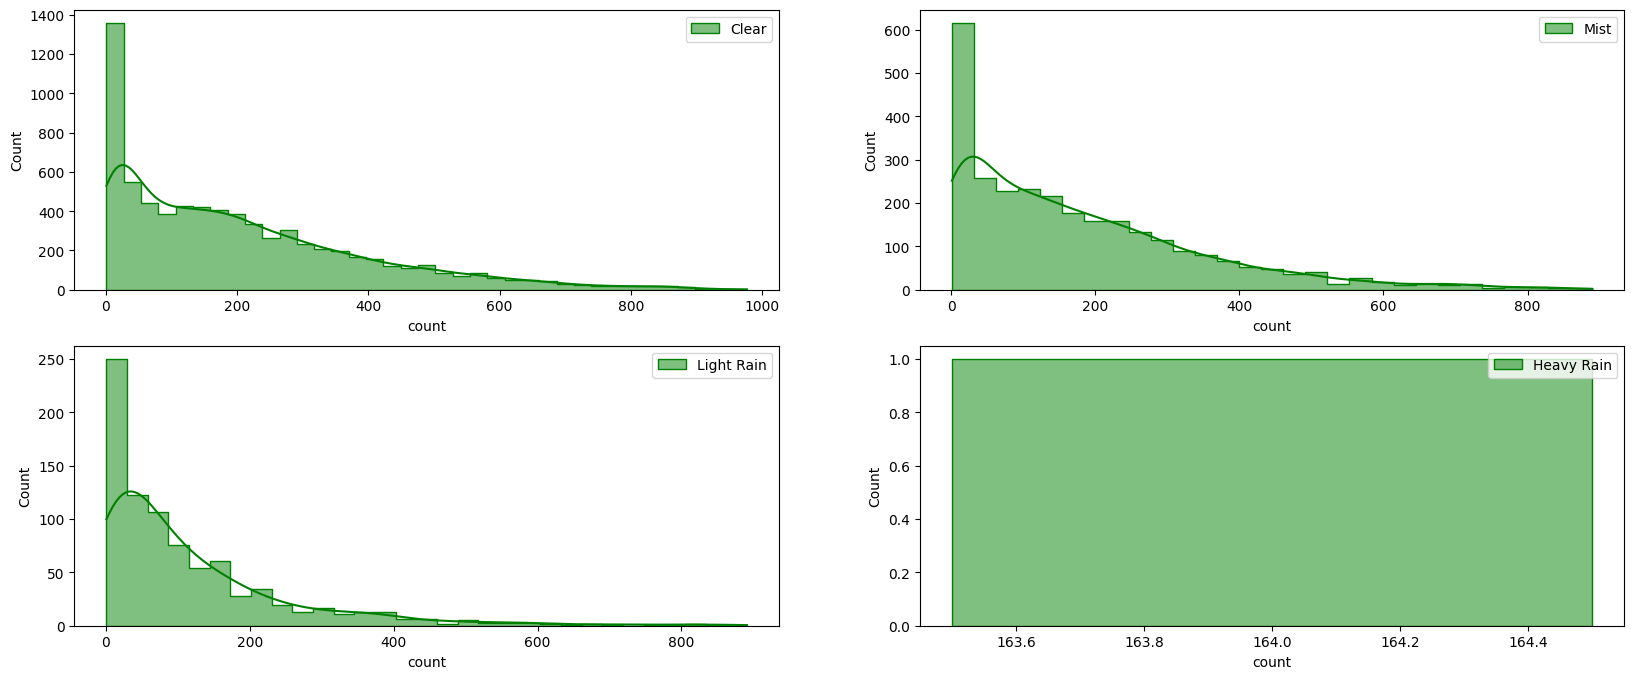

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))

for i, group in enumerate(weather_groups):
    row = i // 2
    col = i % 2
    plot_hist_plot(group['count'], group['weather'].iloc[0], 'green', axes[row, col])
plt.show()

## **Observations from the Histograms:**

- Distribution by Weather:
  - Clear Weather: The histogram for clear weather shows a high frequency of low rental counts, with a long tail towards higher counts. This suggests a large number of days with relatively low rentals and a smaller number of days with very high rentals in clear weather.
  - Mist: The distribution for mist is similar to clear weather, but with a slightly lower peak and a shorter tail, indicating fewer days with very high rentals.
  - Light Rain: The distribution for light rain is also right-skewed, but with a lower peak and a shorter tail compared to clear weather and mist. This suggests that light rain has a more significant impact on reducing rental counts.
  - Heavy Rain: The distribution for heavy rain is very narrow, with most rentals concentrated within a small range. This indicates that heavy rain significantly impacts rental demand, leading to very low rental counts on most days.

## **QQ Plot for Normality Check**

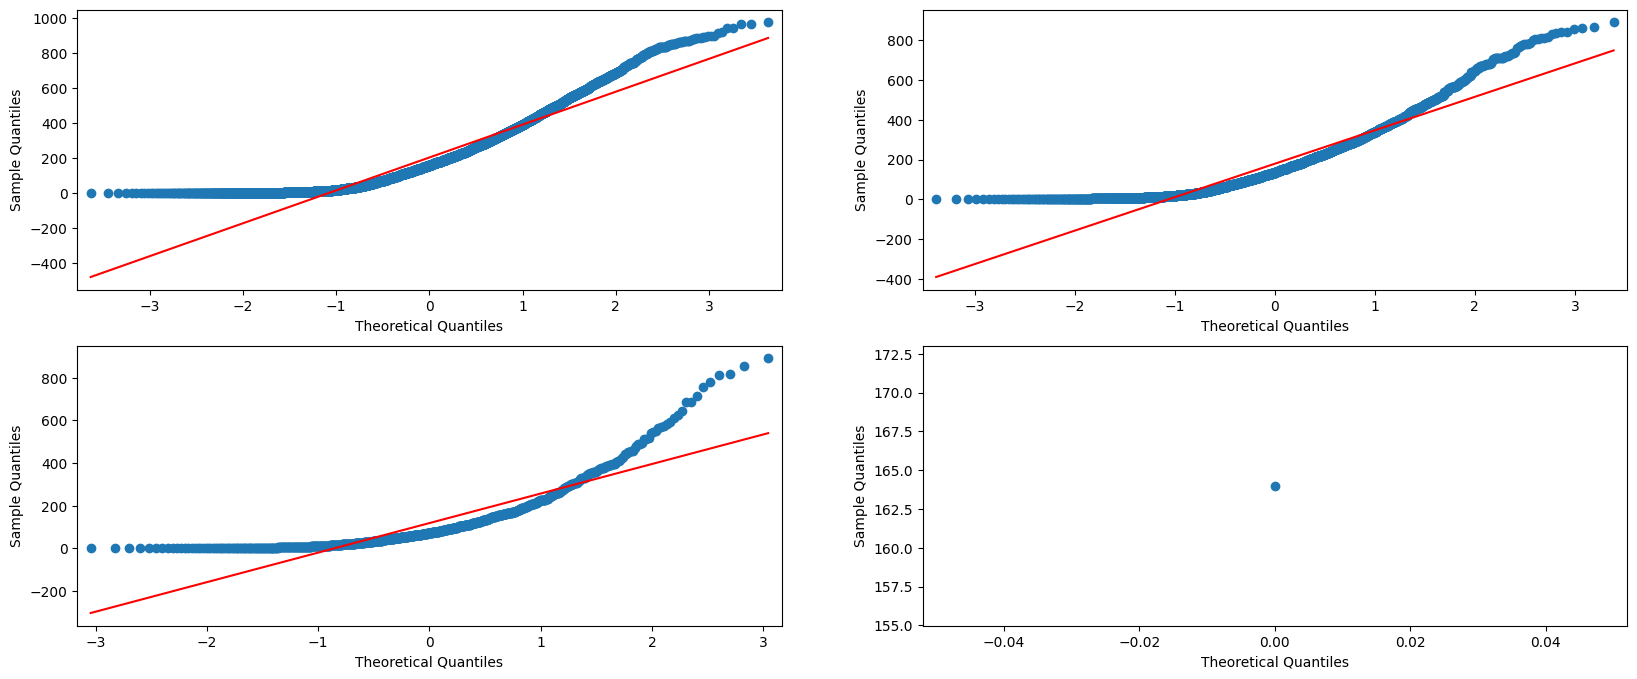

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
for i, group in enumerate(weather_groups):
    row = i // 2
    col = i % 2
    qqplot(group['count'], line='s',ax=axes[row, col])
plt.show()


Observations:

Distribution of Rental Counts by Weather: The code utilizes qqplot (likely referring to a quantile-quantile plot) to visualize the distribution of rental counts (count) for different weather groups (weather_groups). By creating four Q-Q plots (one for each subplot in a 2x2 arrangement), the analyst aims to compare the observed distribution of rental counts against a theoretical normal distribution for each weather group.

Potential for Non-Normality: Q-Q plots are helpful in revealing deviations from normality. If the data points in these plots significantly deviate from the diagonal line, it would suggest that the distribution of rental counts for each weather group is not normal.


## **Stastical test for Normality Test**

In [57]:
for i, group in enumerate(weather_groups):
    weather_type = group['weather'].iloc[0]
    count_data = group['count']

    if len(count_data) >= 3:  # Ensure sufficient data
        stats, p_value = shapiro(count_data)
        result = "normally distributed" if p_value > 0.05 else "not normally distributed"
        print(f"Group {weather_type}: P-Value = {p_value:.4f} | Data is {result}")
    else:
        print(f"Group {weather_type}: Insufficient data for Shapiro-Wilk test (fewer than 3 data points)")
    print('-' * 50)

Group Clear: P-Value = 0.0000 | Data is not normally distributed
--------------------------------------------------
Group Mist: P-Value = 0.0000 | Data is not normally distributed
--------------------------------------------------
Group Light Rain: P-Value = 0.0000 | Data is not normally distributed
--------------------------------------------------
Group Heavy Rain: Insufficient data for Shapiro-Wilk test (fewer than 3 data points)
--------------------------------------------------


Normality Test: we have performs a Shapiro-Wilk test on the "count" (number of rentals) for each weather group ("Clear", "Mist", "Light Rain", and "Heavy Rain"). The Shapiro-Wilk test is a statistical test used to assess whether a sample of data comes from a normally distributed population.

Results:

- For "Clear", "Mist", and "Light Rain" weather groups, the p-values are all very low (0.0000). This indicates that the distribution of rental counts for these weather groups is significantly different from a normal distribution.
- For "Heavy Rain", the test cannot be performed because there are likely insufficient data points for the Shapiro-Wilk test.

## **Equal Variance Check**

In [58]:
levene_test_result,p_value = levene(*[group['count'] for group in weather_groups])

In [59]:
if p_value > 0.05:
  print('variance are Equal')
else:
  print('variance are not Equal')

variance are not Equal


## **Step-3 Let us set siginificance level 0.05, confidence level 95%**

In [60]:
alpha=0.05

#### **The analysis revealed that the distribution of rental counts across weathers is not normal and the variances between weathers are significantly different. These findings violate the assumptions of ANOVA, which requires normality and homogeneity of variances.Therefore, instead of ANOVA, we will employ a non-parametric alternative, the Kruskal-Wallis test, to determine if there are statistically significant differences in the distribution of rental counts across the four weathers. The Kruskal-Wallis test does not rely on the assumptions of normality and equal variances, making it suitable for our analysis**

In [61]:
test_statistics,p_value=kruskal(*[group['count'] for group in weather_groups])
print("p-value:", round(p_value,4))


p-value: 0.0


## Step-4 **Compare P-Value**

In [62]:
print('Conclusion:')
if p_value > alpha:
  print("Fail to Reject Null Hypothesis, mean of total rental cycle of different weather groups are same")
else:
  print("Rejecting Null Hypotheis, mean of total rental cycle of different weather are not same")

Conclusion:
Rejecting Null Hypotheis, mean of total rental cycle of different weather are not same


## 2b **Asummption And Hypothesis for Season**

In [63]:
season_groups = [df[df['season'] == s][['count','season']] for s in df['season'].unique()]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


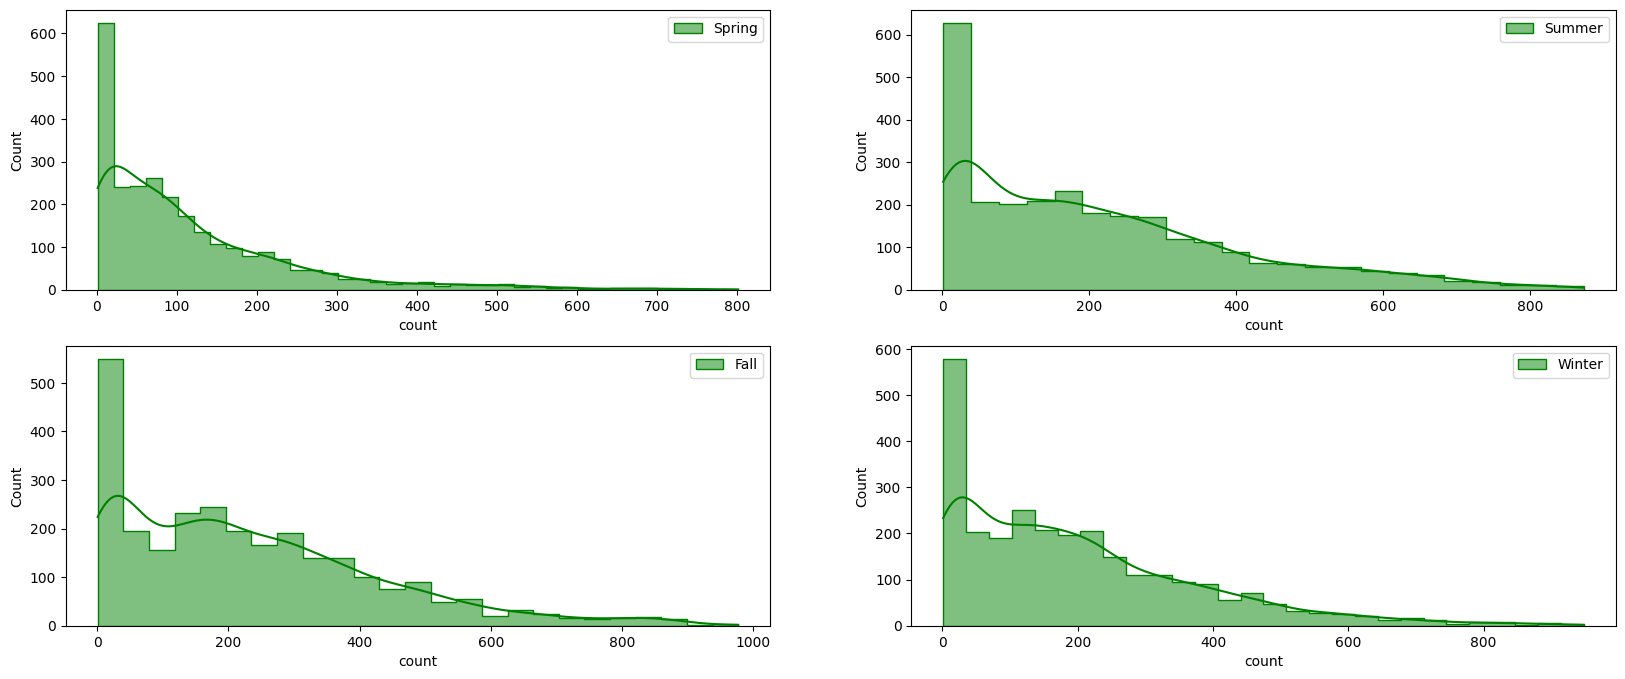

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))

for i, group in enumerate(season_groups):
    row = i // 2
    col = i % 2
    plot_hist_plot(group['count'], group['season'].iloc[0], 'green', axes[row, col])
plt.show()

## **Observations from the Histograms:**

- Distribution by Season:
  - Right Skewness: All four histograms (Spring, Summer, Fall, Winter) exhibit a right-skewed distribution. This indicates that there are a large number of days with relatively low rental counts and a smaller number of days with very high rental counts in each season.

  - Peak Differences: The peak of the distribution appears to be highest in the Summer, suggesting that a higher proportion of days have moderate rental counts during this season. In contrast, the peak seems to be slightly lower in the Winter distribution.

  - Tail Lengths: The tails of the distributions vary across seasons. The Summer distribution seems to have a slightly longer tail compared to other seasons, indicating the presence of more days with exceptionally high rental counts.

## **QQ Plot for Normality Check**

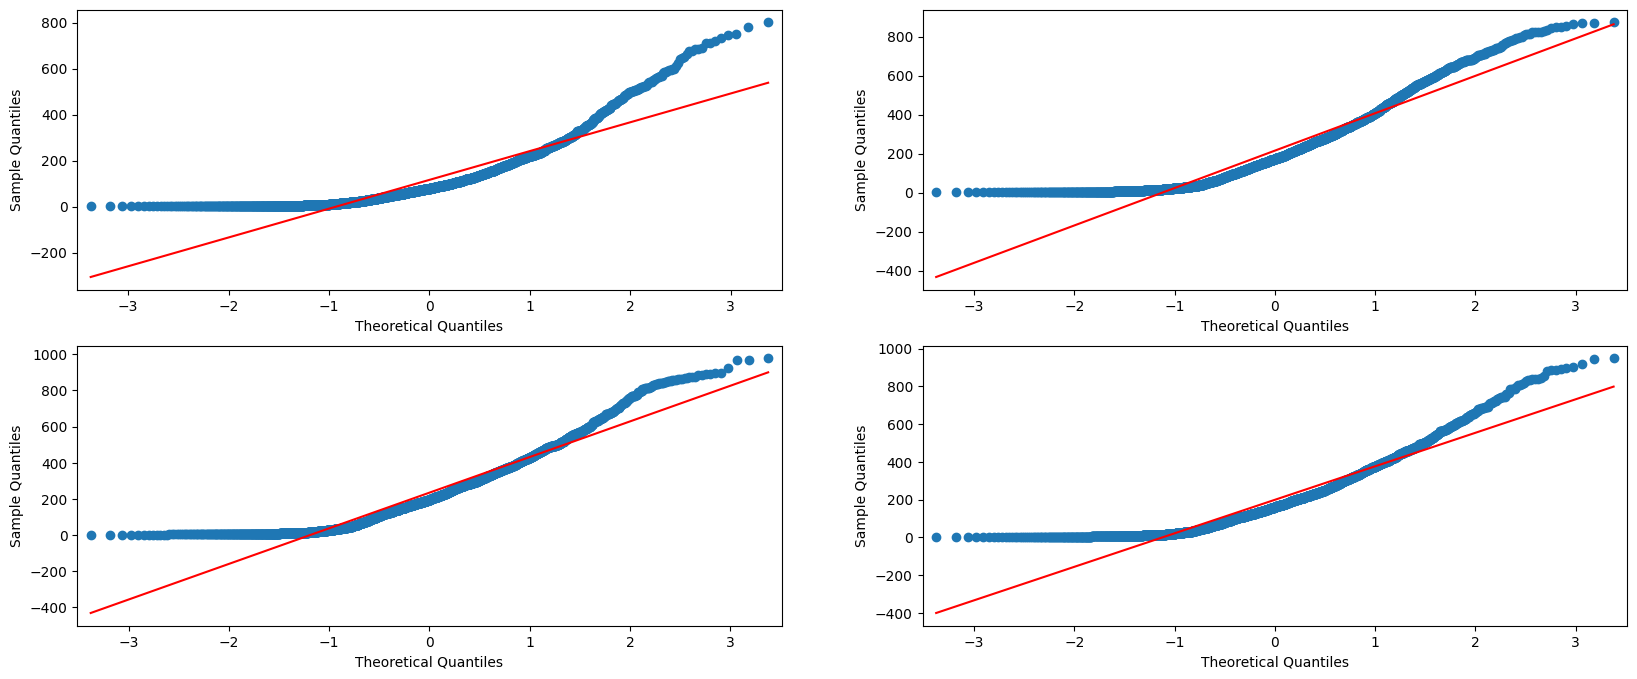

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
for i, group in enumerate(season_groups):
    row = i // 2
    col = i % 2
    qqplot(group['count'], line='s',ax=axes[row, col])
plt.show()

## **Observations**
- The Q-Q plots for all four seasons (Spring, Summer, Fall, Winter) suggest that the distribution of rental counts in each season is not normally distributed. The rightward curve in the plots indicates that the distributions are likely right-skewed.




## **Stastical test for Normality Test**

In [66]:
for i, group in enumerate(season_groups):
    season_type = group['season'].iloc[0]
    count_data = group['count']

    if len(count_data) >= 3:  # Ensure sufficient data
        stats, p_value = shapiro(count_data)
        result = "normally distributed" if p_value > 0.05 else "not normally distributed"
        print(f"Group {season_type}: P-Value = {p_value:.4f} | Data is {result}")
    else:
        print(f"Group {season_type}: Insufficient data for Shapiro-Wilk test (fewer than 3 data points)")
    print('-' * 50)

Group Spring: P-Value = 0.0000 | Data is not normally distributed
--------------------------------------------------
Group Summer: P-Value = 0.0000 | Data is not normally distributed
--------------------------------------------------
Group Fall: P-Value = 0.0000 | Data is not normally distributed
--------------------------------------------------
Group Winter: P-Value = 0.0000 | Data is not normally distributed
--------------------------------------------------


## **Observations:**

- Normality Test: we have performs the Shapiro-Wilk test on the "count" (number of rentals) for each season ("Spring", "Summer", "Fall", and "Winter"). The Shapiro-Wilk test is a statistical test used to assess whether a sample of data comes from a normally distributed population.

- Results: For all four seasons ("Spring", "Summer", "Fall", and "Winter"), the p-values are all very low (0.0000). This indicates that the distribution of rental counts for each season is significantly different from a normal distribution.

## **Equal Variance Check**

In [67]:
levene_test_result,p_value = levene(*[group['count'] for group in season_groups])

In [68]:
if p_value > 0.05:
  print('variance are Equal')
else:
  print('variance are not Equal')

variance are not Equal


## **Step-3 Let us set siginificance level 0.05, confidence level 95%**

In [69]:
alpha=0.05

#### **The analysis revealed that the distribution of rental counts across seasons is not normal and the variances between seasons are significantly different. These findings violate the assumptions of ANOVA, which requires normality and homogeneity of variances.Therefore, instead of ANOVA, we will employ a non-parametric alternative, the Kruskal-Wallis test, to determine if there are statistically significant differences in the distribution of rental counts across the four seasons. The Kruskal-Wallis test does not rely on the assumptions of normality and equal variances, making it suitable for our analysis**

In [70]:
test_statistics,p_value=kruskal(*[group['count'] for group in season_groups])
print("p-value:", round(p_value,4))

p-value: 0.0


## Step-4 **Compare P-Value**

In [71]:
print('Conclusion:')
if p_value > alpha:
  print("Fail to Reject Null Hypothesis, mean of total rental cycle of different season are same")
else:
  print("Reject Null Hypotheis, mean of total rental cycle of different season are not same")

Conclusion:
Reject Null Hypotheis, mean of total rental cycle of different season are not same


### Question 3. **Weather is dependent on the season**

#### **Step-1: Set Up Null Hyppthesis**
- Null Hypothesis(Ho): Weather and Season are not dependent
- Alternate Hypothesis (Ha):  Weather and Season are dependent


In [72]:

contingency_table = pd.crosstab(index=df['weather'],columns= df['season'])
contingency_table


season      Spring  Summer  Fall  Winter
weather                                 
Clear         1759    1801  1930    1702
Mist           715     708   604     807
Light Rain     211     224   199     225
Heavy Rain       1       0     0       0

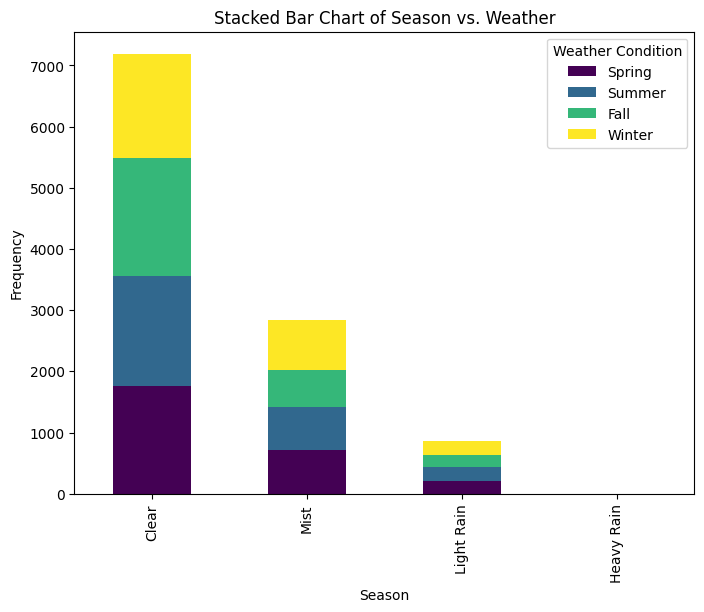

In [73]:
contingency_table.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')
plt.title("Stacked Bar Chart of Season vs. Weather")
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.legend(title="Weather Condition")
plt.show()

## **Observations:**

- Overall Distribution: The chart shows the distribution of weather conditions across the four seasons (Spring, Summer, Fall, Winter).

- Clear Weather Dominance: Clear weather appears to be the most frequent condition across all seasons, with the tallest bars corresponding to "Clear" in each season.

- Seasonal Variations:

  - Spring: In Spring, "Clear" weather is the most frequent, followed by "Mist" and "Light Rain." "Heavy Rain" is the least frequent.
  - Summer: Similar to Spring, "Clear" is the most frequent in Summer, followed by "Mist" and "Light Rain." "Heavy Rain" is again the least frequent.
  - Fall: "Clear" remains the most frequent in Fall, followed by "Mist" and "Light Rain." "Heavy Rain" is again the least frequent.
  - Winter: In Winter, "Clear" is still the most frequent, but "Mist" and "Light Rain" appear to be more frequent compared to Summer and Fall. "Heavy Rain" remains the least frequent.
- Weather Frequency: The frequency of "Mist" and "Light Rain" seems to increase slightly from Spring to Winter, while the frequency of "Heavy Rain" remains relatively low across all seasons.

#### **To investigate the potential association or dependency between two categorical variables, 'weather' and 'season', in the dataset, a chi-square test for independence is an appropriate statistical method.**

In [74]:
stats,p_value, dof, exp= chi2_contingency(contingency_table)

## **Step-2 Let us set siginificance level 0.05, confidence level 95%**

In [75]:
alpha=0.05

## Step-3 **Compare P-Value**

In [76]:
print('Conclusion:')
if p_value > alpha:
  print("Fail to Reject Null Hypothesis, Weather and Season are not dependent")
else:
  print("Rejecting Null Hypotheis, Weather and Season are dependent")

Conclusion:
Rejecting Null Hypotheis, Weather and Season are dependent


# **Business Insights and Recommendations**

## **Business Insights**

- Seasonal Trends in E-Cycle Rentals

    - Peak Season: Summer sees the highest rentals, followed by Fall. This could be due to favorable weather and increased leisure activities.

    - Low Season: Winter experiences the lowest rentals, likely due to colder temperatures and reduced outdoor activities.

    - Recommendation: Implement seasonal promotions and discounts to boost rentals during Winter. Consider collaborating with indoor activity centers to promote cycle usage in colder months.

- Impact of Weather Conditions

    - Clear Weather Dominates: Majority of rentals (66.1%) occur in clear weather, followed by mist (26%).

    - Heavy Rain Significantly Reduces Rentals: Less than 1% of rentals occur during heavy rain conditions.

    - Recommendation: Introduce rain-proofing accessories (e.g., waterproof seat covers) and incentives for rainy days to encourage rentals. Also, adjust pricing dynamically based on weather forecasts.

- Working Days vs. Holidays Impact

    - Higher Rentals on Working Days: 68.1% of rentals occur on working days, suggesting a strong demand for commuting purposes.

    - Low Rentals on Holidays: Only 2.9% of rentals occur on holidays, indicating limited recreational use.

    - Recommendation: Develop weekend and holiday promotions, such as hourly discounts or package deals, to increase casual user engagement.

- User Type Behavior (Casual vs. Registered Users)

    - Registered Users Drive Demand: The number of registered users is significantly higher than casual users, indicating strong customer loyalty.

    - Casual Users Are More Seasonal: Their rentals peak slightly later than registered users, suggesting they are influenced by external events and weather conditions.

    - Recommendation: Implement a membership loyalty program with incentives for casual users to convert into registered users.

- Influence of Temperature, Humidity, and Wind Speed

    - Higher Temperatures Increase Rentals: Rentals increase with temperature but drop after exceeding 30°C.

    - Humidity Has a Negative Impact: High humidity levels correlate with reduced rentals.

    - Wind Speed Affects Rentals: Strong winds deter riders.

    - Recommendation: Enhance customer experience by introducing weather-adaptive pricing models and promoting off-peak time discounts when conditions are unfavorable.

- Chi-Square Analysis: Weather and Season Dependence

    - Statistical Analysis Confirms Dependence: Weather conditions are significantly dependent on seasons, impacting rental trends.

    - Recommendation: Improve operational efficiency by optimizing cycle distribution based on seasonal and weather patterns.

## **Business Recommendations**

- Dynamic Pricing Strategy

    - Implement demand-based pricing, increasing rates during peak hours and providing discounts during low-demand periods (e.g., winter, holidays, and rainy days).

- Customer Segmentation and Targeted Marketing

    - For Commuters (Registered Users): Offer monthly subscription plans with discounts for frequent users.

    - For Casual Users: Introduce referral bonuses and flexible rental packages to encourage one-time users to return.

- Infrastructure and Expansion Strategy

    - Expand to Residential Areas: Increase docking stations near residential zones to cater to morning commuters.

    - Weather-Proof Solutions: Equip cycles with weather-resistant accessories to enhance usability in adverse weather.

- Operational Efficiency

    - Reallocate Resources by Season: Increase cycle availability in peak seasons and reduce maintenance downtime.

    - Enhance Predictive Analytics: Use machine learning models to forecast demand fluctuations and optimize resource allocation.

- Community Engagement and Partnerships

    - Partner with local businesses and tourist attractions to promote leisure rentals.

    - Launch awareness campaigns on the environmental benefits of e-cycles to attract eco-conscious users.

##  **Conclusion**

By leveraging data insights, Yulu can refine its pricing models, customer engagement strategies, and operational efficiency to counter revenue decline. Implementing dynamic pricing, expanding customer segments, and optimizing fleet management based on seasonality and weather will significantly boost revenue and market presence.